# <u>EDA CREDIT CASE STUDY</u>

#<u> Business Understanding</u>
<u><b>PROBLEM STATEMENT:</b></u>

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 
Two types of risks are associated with the bank’s decision:
    
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a 
  financial loss for the company. 

The data given below contains the information about the loan application at the time of applying for the loan. 
It contains two types of scenarios:

* The client with payment difficulties <b>(DEFAULTER) </b>
* All other cases <b>(NON DEFAULTER)</b>

Further, When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

*<u><b>Approved:</b></u> The Company has approved loan Application

*<u><b>Cancelled:</b></u> The client cancelled the application sometime during approval. Either the client changed her/his mind about the 
             loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

*<u><b>Refused:</b></u> The company had rejected the loan (because the client does not meet their requirements etc.).

*<u><b>Unused offer:</b></u>  Loan has been cancelled by the client but at different stages of the process.
    
<u><b>PROPOSED SOLUTION:  </b>  </u>

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

 

# <u>Importing All Data Libraries</u>

In [181]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# <u>Analyzing Application Data</u>

<b>Analysing And Understanding The Data using:
1. Shape of Data.(Using shape function)
2. Information Of Data(Using Info method)
3. Description Of Data(Using describe method)
4. Length Of Data.(Using len method)
5. Number Of Columns.(Using columns function)
6. Size of Data.(Using Size Function)</b>

In [182]:
#reading application data CSV file using Panda libraries
inp0 = pd.read_csv('application_data.csv')
inp0.tail(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [183]:
#Analysing shape of data
inp0.shape

(307511, 122)

In [184]:
#Analysing Info of Records using Verbose attribute to display data in line
inp0.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [185]:
#Analyzing Description of data in quantile ranges 25%,50%,75%,mean,median etc
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [186]:
#Analysing Columns
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
#Analysing Length of Data
len(inp0)

307511

In [187]:
#Analysing Size of Data
inp0.size

37516342

# <u>Step:1 Checking For Missing Values</u>

<b>Here I am performing 2 tasks:<br>
1. Fetching records for null values more than 40% which can be droped.<br>
2. Fetching records for null values less than or equal to 40% which can be filled up by fillna method 
   and substitute suitable values and further cleaned . <br></b>

In [188]:
# checking for null values more than 40%
percent_missing = inp0.isnull().sum() * 100 / len(inp0)
missing_value = pd.DataFrame({'column_name': inp0.columns,'percent_missing': percent_missing})

In [189]:
missing_value.sort_values('percent_missing', inplace=True)

In [190]:
percent_missing.tail(5)

AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [191]:
p = inp0.columns[(inp0.isnull().any())].tolist()

In [192]:
## To check the percentgae of null values present in each column of our dataset
for i in p:
    print(i,"\t",inp0[i].isnull().sum()/int(inp0.shape[0]) *100.0)    

AMT_ANNUITY 	 0.003902299429939092
AMT_GOODS_PRICE 	 0.09040327012692229
NAME_TYPE_SUITE 	 0.42014757195677555
OWN_CAR_AGE 	 65.9908100848425
OCCUPATION_TYPE 	 31.345545362604916
CNT_FAM_MEMBERS 	 0.0006503832383231819
EXT_SOURCE_1 	 56.381072546998325
EXT_SOURCE_2 	 0.21462646864665005
EXT_SOURCE_3 	 19.825307062186393
APARTMENTS_AVG 	 50.74972927797705
BASEMENTAREA_AVG 	 58.51595552679416
YEARS_BEGINEXPLUATATION_AVG 	 48.781019215572776
YEARS_BUILD_AVG 	 66.49778381911543
COMMONAREA_AVG 	 69.87229725115525
ELEVATORS_AVG 	 53.29597965601231
ENTRANCES_AVG 	 50.3487680115508
FLOORSMAX_AVG 	 49.76082156410665
FLOORSMIN_AVG 	 67.84862980511267
LANDAREA_AVG 	 59.376737742714894
LIVINGAPARTMENTS_AVG 	 68.35495315614726
LIVINGAREA_AVG 	 50.193326417591564
NONLIVINGAPARTMENTS_AVG 	 69.43296337366793
NONLIVINGAREA_AVG 	 55.17916432257708
APARTMENTS_MODE 	 50.74972927797705
BASEMENTAREA_MODE 	 58.51595552679416
YEARS_BEGINEXPLUATATION_MODE 	 48.781019215572776
YEARS_BUILD_MODE 	 66.497783819115

In [14]:
# creating 2 list 1 more than 40% null value and 2 less than 40%
# we will drop for more than 40%
# we will check for null value less than 40% ,using fillna method we will substitute value.
col_to_drop=[]
col_to_fill=[]
for i in p:
     val = inp0[i].isnull().sum()/int(inp0.shape[0]) *100.0
     if val > 40  :
        col_to_drop.append(i)
     elif val <= 40 :
        col_to_fill.append(i)    

In [15]:
# more than 40% null values
col_to_drop

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [193]:
## Dropping those columns which have null values > 40%
inp0.drop(col_to_drop,inplace=True,axis=1)

In [194]:
# between 0 to 40%
col_to_fill

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [195]:
a = inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].describe().mean
inp0['AMT_REQ_CREDIT_BUREAU_HOUR'] = inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(a)

b = inp0['AMT_REQ_CREDIT_BUREAU_DAY'].describe().mean
inp0['AMT_REQ_CREDIT_BUREAU_DAY'] = inp0['AMT_REQ_CREDIT_BUREAU_DAY'] .fillna(b)

c = inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].describe().mean
inp0['AMT_REQ_CREDIT_BUREAU_WEEK'] = inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(c)

d = inp0['AMT_REQ_CREDIT_BUREAU_MON'].describe().mean
inp0['AMT_REQ_CREDIT_BUREAU_MON'] = inp0['AMT_REQ_CREDIT_BUREAU_MON'] .fillna(d)

e = inp0['AMT_REQ_CREDIT_BUREAU_QRT'].describe().mean
inp0['AMT_REQ_CREDIT_BUREAU_QRT'] = inp0['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(e)

f = inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].describe().mean
inp0['AMT_REQ_CREDIT_BUREAU_YEAR'] = inp0['AMT_REQ_CREDIT_BUREAU_YEAR'] .fillna(f)

g = inp0['DAYS_LAST_PHONE_CHANGE'].describe().mean
inp0['DAYS_LAST_PHONE_CHANGE'] = inp0['DAYS_LAST_PHONE_CHANGE'].fillna(g)

h = inp0['CNT_FAM_MEMBERS'].describe().mean
inp0['CNT_FAM_MEMBERS'] = inp0['CNT_FAM_MEMBERS'] .fillna(h)

i = inp0['AMT_ANNUITY'].describe().mean
inp0['AMT_ANNUITY'] = inp0['AMT_ANNUITY'] .fillna(i)

j = inp0['AMT_GOODS_PRICE'].describe().mean
inp0['AMT_GOODS_PRICE'] = inp0['AMT_GOODS_PRICE'].fillna(j)

k = inp0['NAME_TYPE_SUITE'].mode()[0]
inp0['NAME_TYPE_SUITE'] = inp0['NAME_TYPE_SUITE'] .fillna(k)

l = inp0['OCCUPATION_TYPE'].mode()[0]
inp0['OCCUPATION_TYPE'] = inp0['OCCUPATION_TYPE'] .fillna(l)

m = inp0['EXT_SOURCE_2'].describe().mean
inp0['EXT_SOURCE_2'] = inp0['EXT_SOURCE_2'].fillna(m)

n = inp0['EXT_SOURCE_3'].describe().mean
inp0['EXT_SOURCE_3'] = inp0['EXT_SOURCE_3'] .fillna(n)

o=inp0['OBS_30_CNT_SOCIAL_CIRCLE'].describe().mean
inp0['OBS_30_CNT_SOCIAL_CIRCLE']=inp0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(o)

p=inp0['OBS_60_CNT_SOCIAL_CIRCLE'].describe().mean
inp0['OBS_60_CNT_SOCIAL_CIRCLE']=inp0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(p)

q=inp0['DEF_60_CNT_SOCIAL_CIRCLE'].describe().mean
inp0['DEF_60_CNT_SOCIAL_CIRCLE']=inp0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(q)

r=inp0['DEF_30_CNT_SOCIAL_CIRCLE'].describe().mean
inp0['DEF_30_CNT_SOCIAL_CIRCLE']=inp0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(r)


In [19]:
## To check the percentgae of null values present in each column of our dataset
for i in inp0:
    print(i,"\t",inp0[i].isnull().sum()/int(inp0.shape[0]) *100.0) 

SK_ID_CURR 	 0.0
TARGET 	 0.0
NAME_CONTRACT_TYPE 	 0.0
CODE_GENDER 	 0.0
FLAG_OWN_CAR 	 0.0
FLAG_OWN_REALTY 	 0.0
CNT_CHILDREN 	 0.0
AMT_INCOME_TOTAL 	 0.0
AMT_CREDIT 	 0.0
AMT_ANNUITY 	 0.0
AMT_GOODS_PRICE 	 0.0
NAME_TYPE_SUITE 	 0.0
NAME_INCOME_TYPE 	 0.0
NAME_EDUCATION_TYPE 	 0.0
NAME_FAMILY_STATUS 	 0.0
NAME_HOUSING_TYPE 	 0.0
REGION_POPULATION_RELATIVE 	 0.0
DAYS_BIRTH 	 0.0
DAYS_EMPLOYED 	 0.0
DAYS_REGISTRATION 	 0.0
DAYS_ID_PUBLISH 	 0.0
FLAG_MOBIL 	 0.0
FLAG_EMP_PHONE 	 0.0
FLAG_WORK_PHONE 	 0.0
FLAG_CONT_MOBILE 	 0.0
FLAG_PHONE 	 0.0
FLAG_EMAIL 	 0.0
OCCUPATION_TYPE 	 0.0
CNT_FAM_MEMBERS 	 0.0
REGION_RATING_CLIENT 	 0.0
REGION_RATING_CLIENT_W_CITY 	 0.0
WEEKDAY_APPR_PROCESS_START 	 0.0
HOUR_APPR_PROCESS_START 	 0.0
REG_REGION_NOT_LIVE_REGION 	 0.0
REG_REGION_NOT_WORK_REGION 	 0.0
LIVE_REGION_NOT_WORK_REGION 	 0.0
REG_CITY_NOT_LIVE_CITY 	 0.0
REG_CITY_NOT_WORK_CITY 	 0.0
LIVE_CITY_NOT_WORK_CITY 	 0.0
ORGANIZATION_TYPE 	 0.0
EXT_SOURCE_2 	 0.0
EXT_SOURCE_3 	 0.0
OBS_30_CNT_SOCIA

In [196]:
inp0.shape

(307511, 73)

# <u>Step2: Now Droping all that records which are not useful for our Data Visualization.</u>

In [199]:
inp0.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  object 
 10  AMT_GOODS_PRICE              307511 non-null  object 
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [200]:
### Also removing FLAG_MOBIL,FLAG_EMP_PHONE etc columns as they are not adding any important value wrt the analysis.
inp0.drop(['FLAG_MOBIL',"FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL"],axis=1,inplace=True)

In [201]:
#Flag_Document is not useful to us in our analysis thus dropping them as they dont really add any value to weather 
## to give someone loan or not these are just general documents 

flag_doc=[]
for i in inp0.columns:
    if "FLAG_DOCUMENT_" in i:
        flag_doc.append(i)
       
print(flag_doc)

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [202]:
# dropping all flag Document
inp0.drop(flag_doc,inplace=True,axis=1)

In [203]:
#Some additional fields which are not much needed while doing Analysis
inp0.drop(['EXT_SOURCE_2',"EXT_SOURCE_3","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",
           "REG_CITY_NOT_LIVE_CITY","DAYS_LAST_PHONE_CHANGE"],axis=1,inplace=True)

In [204]:
#Some additional fields which are not much needed while doing Analysis
inp0.drop(['REG_CITY_NOT_WORK_CITY',"LIVE_CITY_NOT_WORK_CITY","REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT"],axis=1,inplace=True)

In [205]:
inp0.drop(['OBS_30_CNT_SOCIAL_CIRCLE',"DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR"
          ,"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"],axis=1,inplace=True)

In [206]:
inp0.shape

(307511, 26)

In [29]:
inp0.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
ORGANIZATION_TYPE             0
dtype: int64

# <u>Step3 : Changing for some specific values and Missing Value Substitution </u>

In [208]:
inp0[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].head(5)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


In [209]:
inp0['DAYS_BIRTH'] = abs(inp0['DAYS_BIRTH'])
inp0['DAYS_EMPLOYED'] = abs(inp0['DAYS_EMPLOYED'])
inp0['DAYS_REGISTRATION'] = abs(inp0['DAYS_REGISTRATION'])
inp0['DAYS_ID_PUBLISH']=abs(inp0['DAYS_ID_PUBLISH'])

In [210]:
#checking Values
inp0[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].head(5)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458


In [211]:
# Here we can see that DAYS_BIRTH is not in correct format
# As we have in days format we have to convert into year format

inp0['DAYS_BIRTH']=inp0['DAYS_BIRTH'].apply(lambda x : int(x/365))

In [212]:
inp0['DAYS_BIRTH'].head(5)

0    25
1    45
2    52
3    52
4    54
Name: DAYS_BIRTH, dtype: int64

In [213]:
inp0.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                    object
AMT_GOODS_PRICE                object
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS                object
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
ORGANIZATION_TYPE              object
dtype: objec

In [214]:
inp0['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [215]:
inp0['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [216]:
# Replace XNA with max value 'F'
inp0['CODE_GENDER'].replace('XNA','F',inplace=True)

In [217]:
inp0['CODE_GENDER'] =inp0['CODE_GENDER'].apply(lambda x : "MALE" if x=='M' else "FEMALE")

In [218]:
inp0['CODE_GENDER'].value_counts()

FEMALE    202452
MALE      105059
Name: CODE_GENDER, dtype: int64

In [219]:
inp0['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [220]:
inp0['FLAG_OWN_CAR']=inp0['FLAG_OWN_CAR'].apply(lambda x : "No" if x=='N' else "Yes")

In [221]:
inp0['FLAG_OWN_CAR'].value_counts()

No     202924
Yes    104587
Name: FLAG_OWN_CAR, dtype: int64

In [222]:
inp0['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [223]:
inp0['FLAG_OWN_REALTY']=inp0['FLAG_OWN_REALTY'].apply(lambda x : "Yes" if x=='Y' else "No")

In [224]:
inp0['FLAG_OWN_REALTY'].value_counts()

Yes    213312
No      94199
Name: FLAG_OWN_REALTY, dtype: int64

In [225]:
inp0['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [226]:
inp0['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [227]:
inp0['NAME_EDUCATION_TYPE'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Secondary / secondary special
1                      Higher education
2         Secondary / secondary special
3         Secondary / secondary special
4         Secondary / secondary special
                      ...              
307506    Secondary / secondary special
307507    Secondary / secondary special
307508                 Higher education
307509    Secondary / secondary special
307510                 Higher education
Name: NAME_EDUCATION_TYPE, Length: 307511, dtype: object>

In [228]:
inp0['NAME_EDUCATION_TYPE']=inp0['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special','Secondary')

In [229]:
inp0['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [230]:
inp0['NAME_FAMILY_STATUS']= inp0['NAME_FAMILY_STATUS'].replace('Unknown',inp0['NAME_FAMILY_STATUS'].mode()[0])

In [231]:
inp0['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [232]:
inp0['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [233]:
inp0['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [234]:
inp0['OCCUPATION_TYPE'].value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [235]:
inp0['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [236]:
inp0['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [237]:
inp0['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [238]:
inp0['ORGANIZATION_TYPE'] = inp0['ORGANIZATION_TYPE'].replace('XNA',inp0['ORGANIZATION_TYPE'].mode()[0])

In [239]:
inp0['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    123366
Self-employed              38412
Other                      16683
Medicine                   11193
Business Entity Type 2     10553
Government                 10404
School                      8893
Trade: type 7               7831
Kindergarten                6880
Construction                6721
Business Entity Type 1      5984
Transport: type 4           5398
Trade: type 3               3492
Industry: type 9            3368
Industry: type 3            3278
Security                    3247
Housing                     2958
Industry: type 11           2704
Military                    2634
Bank                        2507
Agriculture                 2454
Police                      2341
Transport: type 2           2204
Postal                      2157
Security Ministries         1974
Trade: type 2               1900
Restaurant                  1811
Services                    1575
University                  1327
Industry: type 7            1307
Transport:

# <u>Step 4 : Data Visualization using Ploting And Finding Insights</u>

<b>1. UNIVARIATE ANALYSIS</b>

In [240]:
#Reset the index
inp0.reset_index(inplace=True, drop=True)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307511 non-null  object 
 10  AMT_GOODS_PRICE             307511 non-null  object 
 11  NAME_TYPE_SUITE             307511 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [241]:
### Now creating list of numerical variables for outlier detection and finding insights

list_of_int_val =[]
for i in inp0:
    if (inp0[i].dtypes == 'int64') or (inp0[i].dtypes == 'float64'):
         list_of_int_val.append(i)            
print(list_of_int_val)            

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']


# (i)..... Outlier Analysis of each Numerical Variable With Distribution Plot

In [242]:
 inp0['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

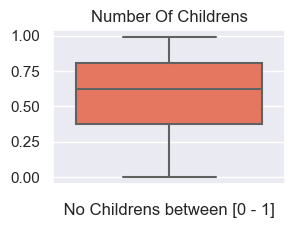

In [243]:
plt.figure(figsize = (3,2))
a = sns.boxplot(inp0['CNT_CHILDREN'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="Number Of Childrens" , 
                                                                                             xlabel=" No Childrens between [0 - 1] ")
plt.show()

<b>Here we can see max value for children is 0 as many people don't have kids.Hence we can see min and mean both are 0.
Hence value lies in between 0 to 1.</b>

In [68]:
 inp0['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

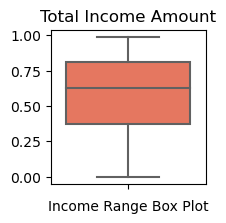

In [69]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['AMT_INCOME_TOTAL'].describe(),palette = 'Reds' ,y=[0.0,0.50,0.75,0.99]).set(title="Total Income Amount" , 
                                                                                             xlabel="Income Range Box Plot")
plt.show()

<b>Here we can observe that on Y axis we have divided the values in quantile ranging from 0.0 to 0.99 and plotted againt it.We can clearly see 
that max value of Income ranges from 40% to 80%.There is also an outlier lies on max 0.99%.</b>

In [70]:
inp0['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

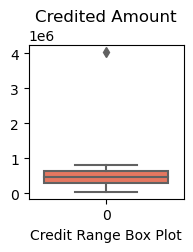

In [71]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['AMT_CREDIT'].describe(),palette = "Reds").set(title="Credited Amount",xlabel="Credit Range Box Plot")
plt.show()

<b>Here we can see that mean,min,max having values in continous fashion .Hence no outlier present in it.</b>

In [72]:
inp0['AMT_ANNUITY'].describe()

count     307511.0
unique     13673.0
top         9000.0
freq        6385.0
Name: AMT_ANNUITY, dtype: float64

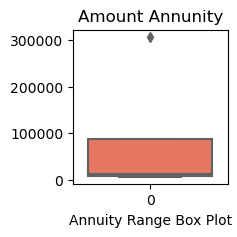

In [73]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['AMT_ANNUITY'].describe(),palette = "Reds").set(title="Amount Annunity",xlabel="Annuity Range Box Plot")
plt.show()

<b>Here also data is in continous fashion ,not much outlier present.</b>

In [74]:
inp0['AMT_GOODS_PRICE'].describe()

count     307511.0
unique      1003.0
top       450000.0
freq       26022.0
Name: AMT_GOODS_PRICE, dtype: float64

[Text(0.5, 1.0, 'Goods Price'), Text(0.5, 0, 'Price Range Box Plot')]

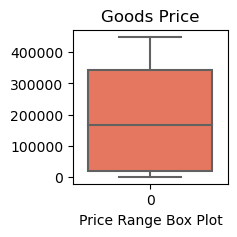

In [75]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['AMT_GOODS_PRICE'].describe(),palette = "Reds").set(title="Goods Price",xlabel="Price Range Box Plot")

<b>Here also Data is in contionous fashion as such no outlier present</b>

In [76]:
inp0['DAYS_BIRTH'] = abs(inp0['DAYS_BIRTH'])
inp0['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

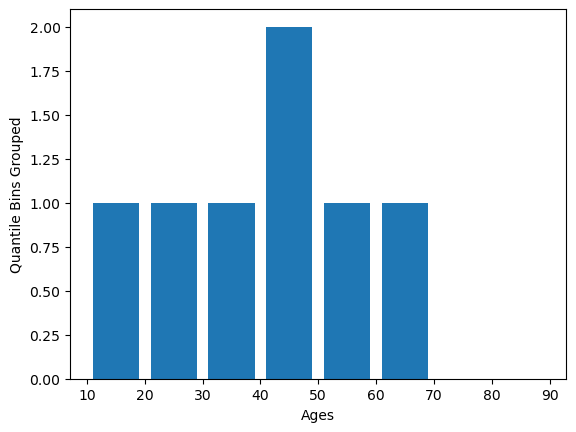

In [77]:
# sns.barplot(inp0['DAYS_BIRTH'].describe(),palette = "Reds")
bins = [10,20,30,40,50,60,70,80,90]
plt.hist(inp0['DAYS_BIRTH'].describe(), bins, histtype='bar', rwidth=0.8)
plt.xlabel('Ages')
plt.ylabel('Quantile Bins Grouped')
plt.show()

<b>Here we can see the number of people Ages in between 20 to 70 apply for loan.Where as maxmimum loan where applied by 
people between 40 to 50 Yrs in Age. </b>

In [78]:
inp0['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

[Text(0.5, 1.0, 'DAYS_EMPLOYED'), Text(0.5, 0, 'Employed Range Box Plot')]

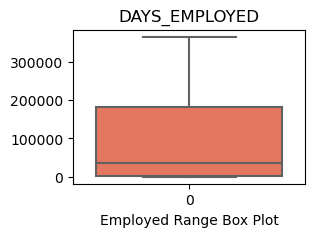

In [79]:
plt.figure(figsize = (3,2))
sns.boxplot(inp0['DAYS_EMPLOYED'].describe(),palette = "Reds").set(title="DAYS_EMPLOYED",xlabel="Employed Range Box Plot")

<b>Here we can see there is an huge range of outlier lies.AS data is not continous between mean ,std and max. </b>

In [80]:
inp0['CNT_FAM_MEMBERS'].describe()  

count     307511.0
unique        18.0
top            2.0
freq      158357.0
Name: CNT_FAM_MEMBERS, dtype: float64

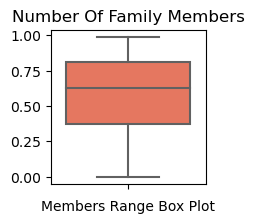

In [81]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['CNT_FAM_MEMBERS'].describe(),palette = "Reds",y=[0.0,0.50,0.75,0.99]).set(title="Number Of Family Members",
                                                                                            xlabel="Members Range Box Plot")
plt.show()

<b>As we can see here mostly they have 2 or 3 family members or less than that ,yes outlier of 20 members exists in some cases.</b>

<b>Substitued Each column and analysed it and output is written Below for each Feild .</b>

* CNT_FAM_MEMBERS -- As we can see here mostly they have 2 or 3 family members or less than that ,yes 
                     outlier of 20 members exists in some cases.

* DAYS_REGISTRATION -- Data is continous as such no outlier is present

* DAYS_ID_PUBLISH -- Here data is Continous ,no as such outlier present

* HOUR_APPR_PROCESS_START -- Ranges in between 0 to 23 .As such data is continous ,No outlier is present.

* DAYS_LAST_PHONE_CHANGE -- Here data is continous and in some where data is not continous .Few outlier present.


# (ii) -- Outlier Analysis with Categorical Variables with Distribution Plot

<b>We are going to check each categorical variable with respect to TARGET as we know if TARGET is 1 ,it means person is defaulter 
and if TARGET is 0 ,Means Not a Defaulter </b>

In [82]:
# created and fetched a list of categorical data feild from our dataset for easy Analysing.
list_of_categorical_data = []

for i in inp0:
    if(inp0[i].dtypes == "object"):
        list_of_categorical_data.append(i)
print(list_of_categorical_data)        

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


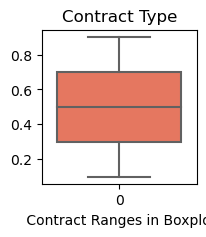

In [85]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['NAME_CONTRACT_TYPE'].value_counts(normalize=True),palette = 'Reds').set(title="Contract Type", xlabel=" Contract Ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion No outlier Present.</b>

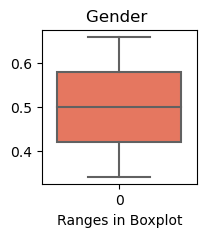

In [86]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['CODE_GENDER'].value_counts(normalize=True),palette = 'Reds').set(title="Gender ", xlabel="Ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion No outlier Present.</b>

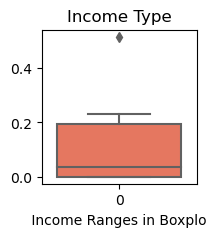

In [90]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['NAME_INCOME_TYPE'].value_counts(normalize=True),palette = 'Reds').set(title="Income Type", xlabel=" Income Ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion Very rare outlier Present.</b>

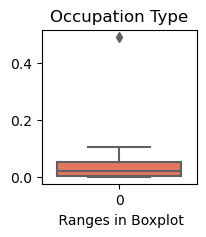

In [89]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['OCCUPATION_TYPE'].value_counts(normalize=True),palette = 'Reds').set(title="Occupation Type", xlabel=" Ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion No outlier Present.</b>

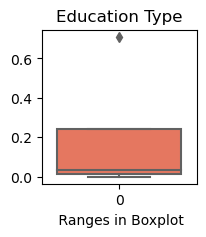

In [93]:
plt.figure(figsize = (2,2))
sns.boxplot(inp0['NAME_EDUCATION_TYPE'].value_counts(normalize=True),palette = 'Reds').set(title="Education Type", xlabel=" Ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion No outlier Present.</b>

# <u> 2. BIVARIATE ANALYSIS ON APPLICATION DATA</u>

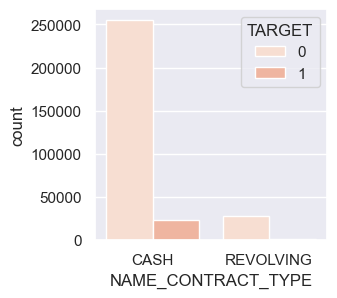

In [244]:
# Identification if loan is cash or revolving with respect to TARGET 
plt.figure(figsize=(3,3))
k=sns.countplot(data=inp0,x=inp0.NAME_CONTRACT_TYPE,hue="TARGET")
k.set_xticklabels(["CASH","REVOLVING"])
plt.show()

<b>Here we can see that Number of Defaulter is more in CASH Payment whereas bit less in Revolving Payment Strategy.
Also we can analyse that max people undergo  with CASH type payment instead of Revolving payment Strategy.</b>

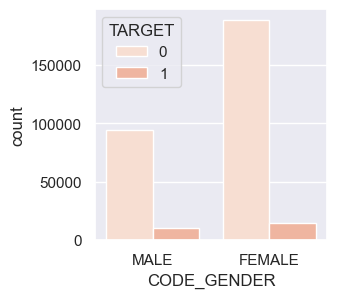

In [245]:
plt.figure(figsize=(3,3))
k=sns.countplot(data=inp0,x=inp0.CODE_GENDER,hue="TARGET")
k.set_xticklabels(["MALE","FEMALE"])
plt.show()

<b>Here we can see Analyse that FEMALE and MALE both were defaulter in some cases.Whereas Percentage of FEMALES are more
for applying loan than MALES.</b>

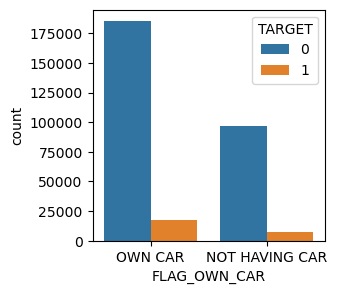

In [122]:
plt.figure(figsize=(3,3))
k=sns.countplot(data=inp0,x=inp0.FLAG_OWN_CAR,hue="TARGET")
k.set_xticklabels(["OWN CAR","NOT HAVING CAR"])
plt.show()

<b>Here we can observe that People who owns a car a more likely to apply for loan as compared to those who don't own a car.
And Defaulter cases are also same.</b>

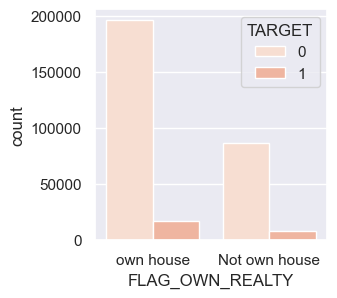

In [246]:
plt.figure(figsize=(3,3))
h=sns.countplot(data=inp0,x=inp0.FLAG_OWN_REALTY,hue="TARGET")
h.set_xticklabels(["own house","Not own house"])
plt.show()

<b>Here we can observe that People who owns a House a more likely to apply for loan as compared to those who don't own a House. 
And Defaulter cases are also same.</b>

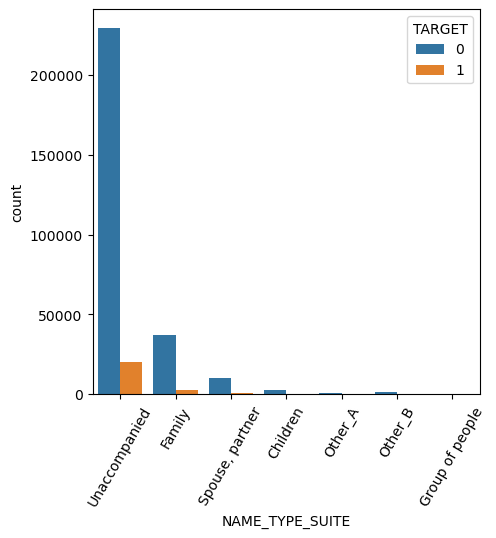

In [123]:
plt.figure(figsize=(5,5))
h=sns.countplot(data=inp0,x=inp0.NAME_TYPE_SUITE,hue="TARGET")
plt.xticks(rotation=60)
plt.show()

<b>Here we can observe that People who are Unaccompanied are more likely to apply for loan as compared to others. 
And Defaulter cases are also same.</b>

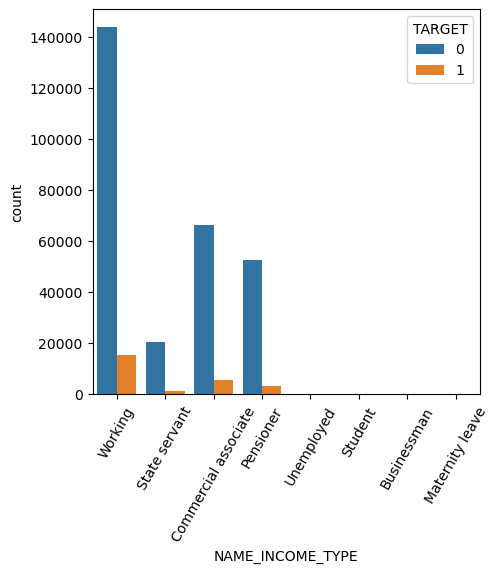

In [126]:
plt.figure(figsize=(5,5))
h=sns.countplot(data=inp0,x=inp0.NAME_INCOME_TYPE,hue="TARGET")
plt.xticks(rotation=60)
plt.show()

<b>Here we can observe that Working people are more likely to apply for loan whereas Commerical Associate and Pensioners 
also apply for loan.But defaulters are more in WORKING type people than others.</b>

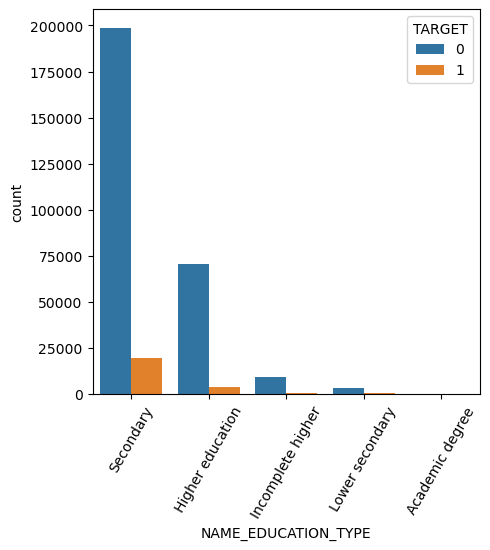

In [124]:
plt.figure(figsize=(5,5))
h=sns.countplot(data=inp0,x=inp0.NAME_EDUCATION_TYPE,hue="TARGET")
plt.xticks(rotation=60)
plt.show()

<b>Here we can analyse Secondary Education People are more likely to apply for loan and defaulter cases are also more as compared 
to others</b>

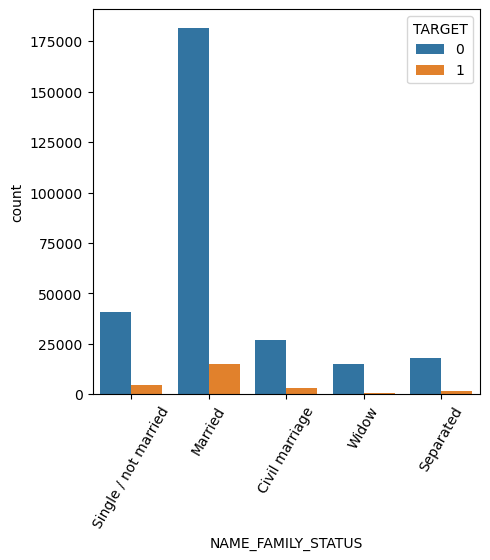

In [125]:
plt.figure(figsize=(5,5))
h=sns.countplot(data=inp0,x=inp0.NAME_FAMILY_STATUS,hue="TARGET")
plt.xticks(rotation=60)
plt.show()

<b>We can Analyse that Married people are more likely to apply for loan than others and defaulter rate is also more than other categories.</b>

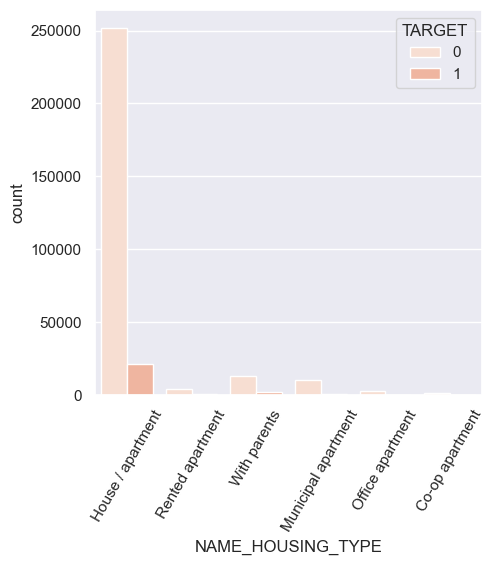

In [247]:
plt.figure(figsize=(5,5))
h=sns.countplot(data=inp0,x=inp0.NAME_HOUSING_TYPE,hue="TARGET")
plt.xticks(rotation=60)
plt.show()

<b>We can observe that people who lives in Houses/Apartments are more likely to apply for loans and become defaulter too
as compared to others.</b>

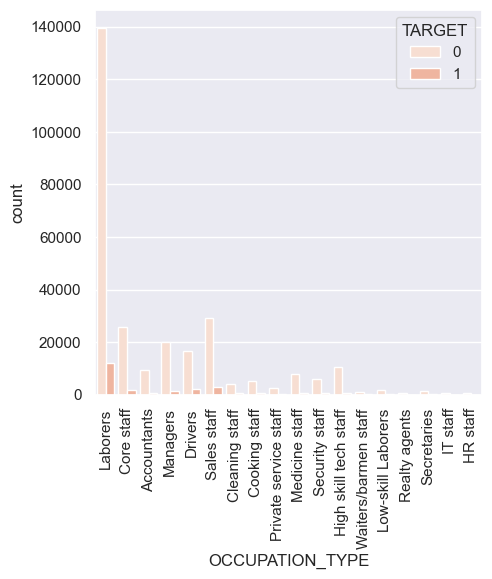

In [248]:
plt.figure(figsize=(5,5))
h=sns.countplot(data=inp0,x=inp0.OCCUPATION_TYPE,hue="TARGET")
plt.xticks(rotation=90)
plt.show()

<b>We can observe that people who work as Labores, Core Staff,Managers,Drivers,Sales Staff are more likely to apply for loan.
Whereas Defaulters are more in numbers in Laborers as compared to others.</b>

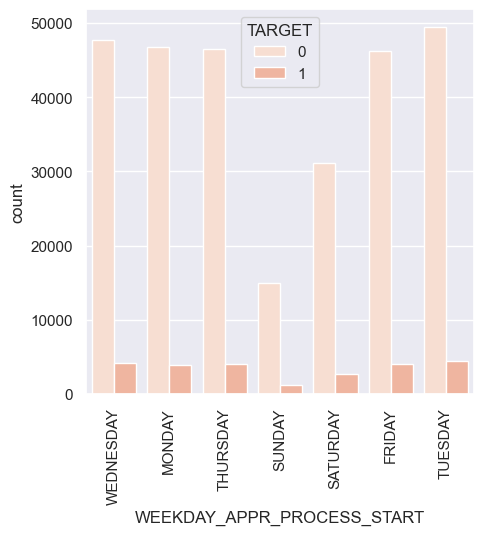

In [249]:
plt.figure(figsize=(5,5))
h=sns.countplot(data=inp0,x=inp0.WEEKDAY_APPR_PROCESS_START,hue="TARGET")
plt.xticks(rotation=90)
plt.show()

<b>Here we can observe that only on Sunday's People are very much less likely to apply for loan.whereas all other days in week 
people apply for loan more or less same in numbers but Saturday bit less in numbers.Defaulters are same in numbers in every day
of week,but bit less on Sundays.</b>


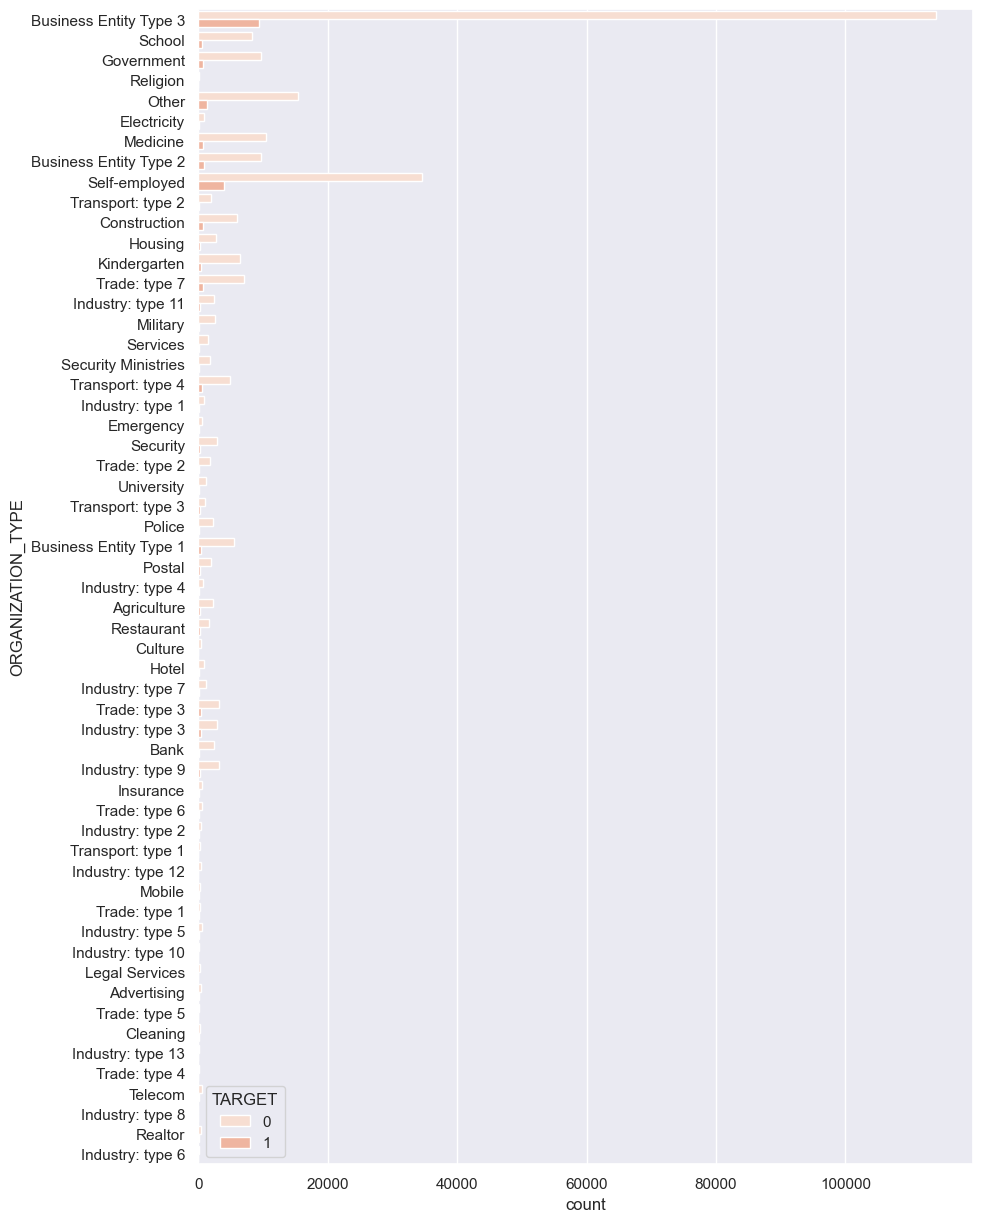

In [250]:
plt.figure(figsize=(10,15))
h=sns.countplot(data=inp0,y=inp0.ORGANIZATION_TYPE,hue="TARGET")
# plt.xticks(rotation=90)
plt.show()

<b>Here we observe that Business Entity Type-3 and Self Employed Organization Working people are more likely to apply for 
loan than other categories and there Defaulter rate is also high.</b>

# 4.1 DISTRIBUTION PLOT WITH RESPECT TO TARGET

<b> 2. (i) BIVARIATE ANALYSIS OF NUMERICAL VARIABLES</b>

In [158]:
# List of imp numeric feilds only
imp_num_list = ["AMT_INCOME_TOTAL","AMT_CREDIT"]

<b>(i)--WITH RESPECT TO NON DEFAULTER</b>

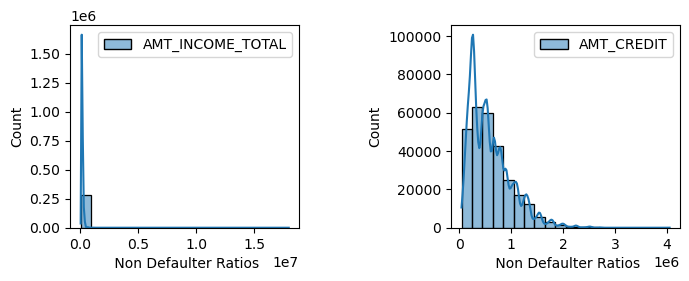

In [159]:
fig, axes = plt.subplots(1, 2,figsize=(8,4))

for item,ax in zip(imp_num_list,axes.flatten()):
    
    sns.histplot(data=inp0[(inp0.TARGET==0)][[item]],kde=True,bins=20,ax=ax).set(xlabel=" Non Defaulter Ratios")
    
fig.tight_layout(pad=5.0)

plt.show()    

<b>(ii) -- WITH RESPECT TO DEFAULTER</b>

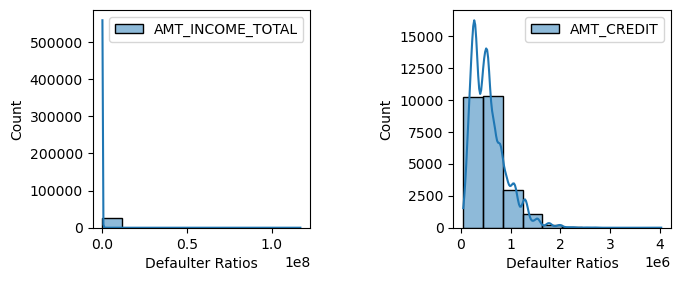

In [160]:
fig, axes = plt.subplots(1, 2,figsize=(8,4))

for item,ax in zip(imp_num_list,axes.flatten()):
    
    sns.histplot(data=inp0[(inp0.TARGET==1)][[item]],kde=True,bins=10,ax=ax).set(xlabel="Defaulter Ratios")
    
fig.tight_layout(pad=5.0)

plt.show()

<b>Hist Plot Shows the shape of data of Income of the client,Credit amount of the loan with respect to Target Variable.
For Defaulter and Non Defaulter Ratios.Clearly we can see approx 85% and more are not defaulters where as approx 15% 
were defaulters. This ratio is quite enough to analyze that Non Defaulters are less in Number as compared to defaulter.</b>


# 4.2 DISTRIBUTION PLOT WITH RESPECT TO AMT_INCOME_TOTAL

<b> 2.(ii). BIVARIATE ANALYSIS OF CATEGORICAL VARIABLES</b>

<Axes: xlabel='CODE_GENDER'>

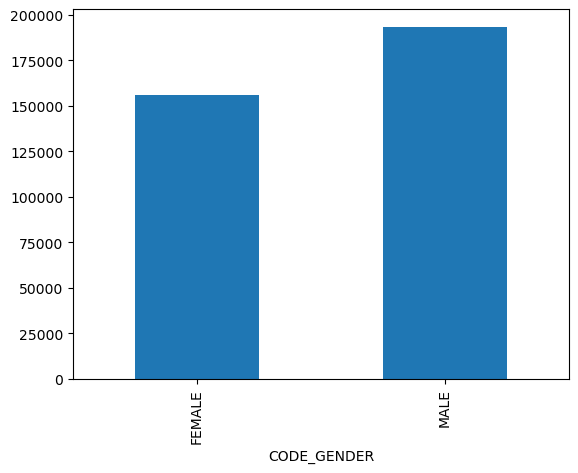

In [161]:
inp0.groupby(['CODE_GENDER'])['AMT_INCOME_TOTAL'].mean().plot.bar()

<b>Here we can see that MALE is earning more income than FEMALE.</b>

<Axes: xlabel='NAME_INCOME_TYPE'>

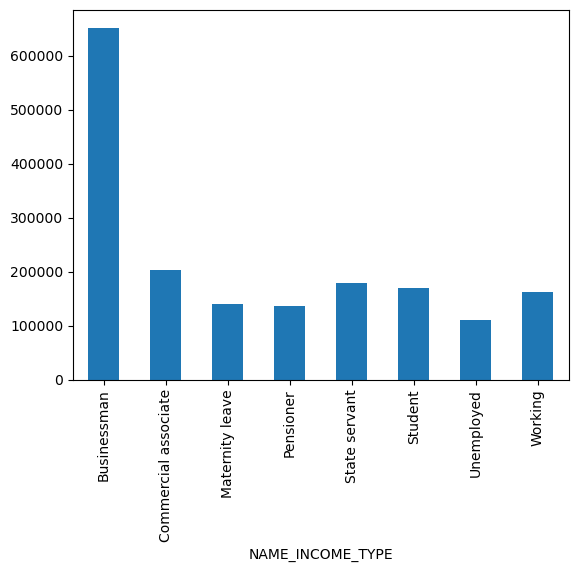

In [162]:
inp0.groupby(['NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().plot.bar()

<b>Busineessman is having High Income than others.</b>

<Axes: xlabel='NAME_EDUCATION_TYPE'>

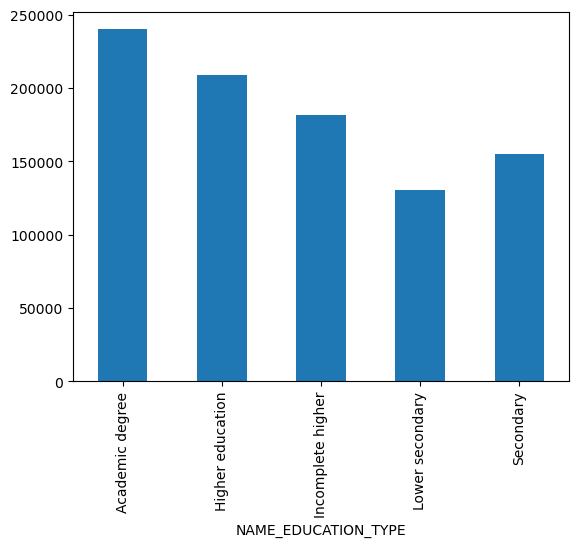

In [163]:
inp0.groupby(['NAME_EDUCATION_TYPE'])['AMT_INCOME_TOTAL'].mean().plot.bar()

<b>Acadamic Holder is earning More income than others.</b>

<Axes: xlabel='NAME_FAMILY_STATUS'>

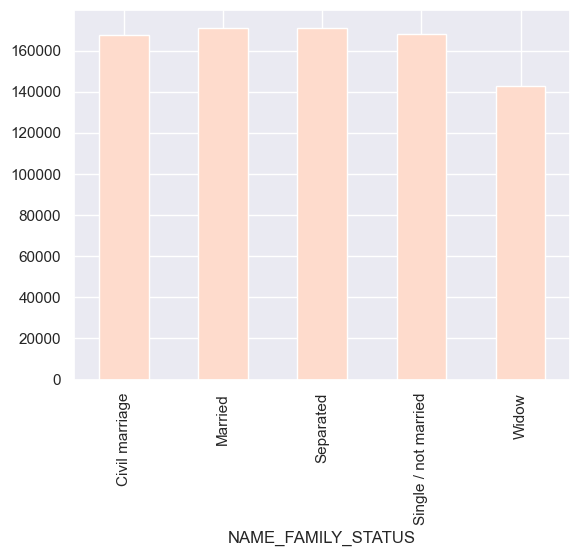

In [251]:
inp0.groupby(['NAME_FAMILY_STATUS'])['AMT_INCOME_TOTAL'].mean().plot.bar()

<b>Family Status is almost same in each case.They all have an average amount of income.</b>

<Axes: xlabel='OCCUPATION_TYPE'>

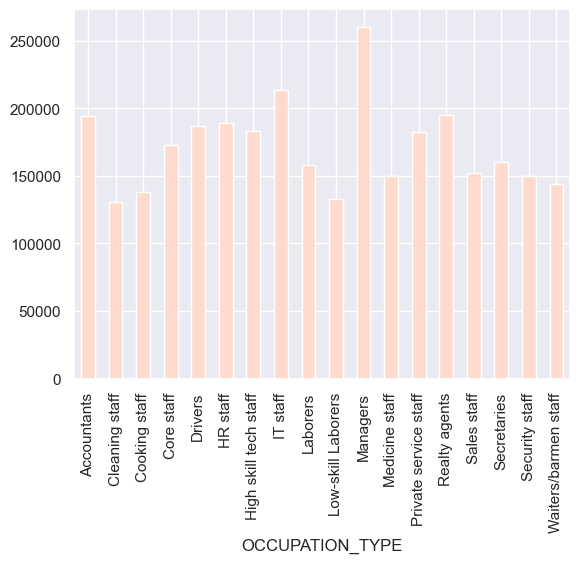

In [252]:
inp0.groupby(['OCCUPATION_TYPE'])['AMT_INCOME_TOTAL'].mean().plot.bar()

<b>Managers and Accounts have a maximum income.Remaining all are having a average amount of income.</b>

<Axes: xlabel='ORGANIZATION_TYPE'>

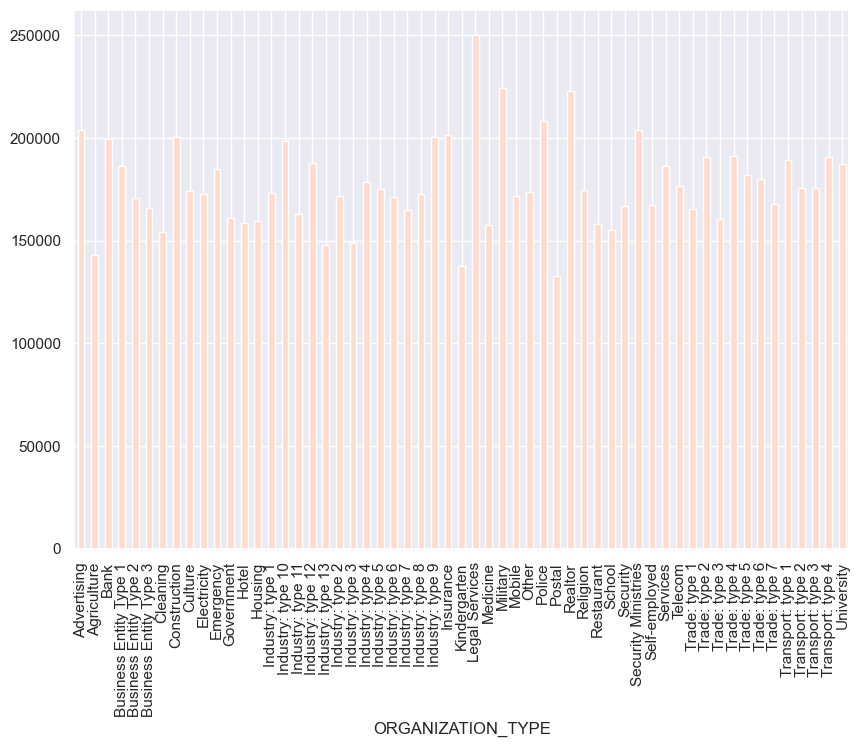

In [253]:
plt.figure(figsize=(10,7))
inp0.groupby(['ORGANIZATION_TYPE'])['AMT_INCOME_TOTAL'].mean().plot.bar()

<b>Legal Services,Retailer,Military,Security Ministers,Advertising organization's income is more as compared to other organization 
category.But on an average remaining all have a average amount of income.</b>

# 5 . HEATMAPS 

<b>MULTIVARIATE ANALYSIS</b>

In [ ]:
inp0.info(verbose=1)

In [164]:
inp0.TARGET.mean() # To have a value in center and then cluster the data near to it.

0.08072881945686496

In [165]:
#using qcut method we can divide the data into suitable bins
a = pd.qcut(inp0['DAYS_BIRTH'], q=5)

In [166]:
#Creating pivot table with gender,family status,education type with respect to Target.
pivot_table_1= pd.pivot_table(data = inp0, values='TARGET', index=['CODE_GENDER','NAME_FAMILY_STATUS'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

pivot_table_1

NAME_EDUCATION_TYPE               Academic degree  Higher education  \
CODE_GENDER NAME_FAMILY_STATUS                                        
FEMALE      Civil marriage               0.000000          0.057819   
            Married                      0.030769          0.046572   
            Separated                    0.000000          0.048113   
            Single / not married         0.058824          0.052118   
            Widow                        0.000000          0.042711   
MALE        Civil marriage               0.000000          0.091327   
            Married                      0.000000          0.055047   
            Separated                    0.000000          0.094622   
            Single / not married         0.000000          0.081924   
            Widow                        0.000000          0.123377   

NAME_EDUCATION_TYPE               Incomplete higher  Lower secondary  \
CODE_GENDER NAME_FAMILY_STATUS                                         
FEMALE      Civil marriage                 0.083641         0.109170   
            Married                        0.079609         0.087993   
            Separated                      0.083756         0.116564   
            Single / not married           0.083063         0.119355   
            Widow                          0.038217         0.066158   
MALE        Civil marriage                 0.113372         0.169399   
            Married                        0.078440         0.121429   
            Separated                      0.093750         0.203704   
            Single / not married           0.107890         0.148699   
            Widow                          0.312500         0.105263   

NAME_EDUCATION_TYPE               Secondary  
CODE_GENDER NAME_FAMILY_STATUS               
FEMALE      Civil marriage         0.092109  
            Married                0.074957  
            Separated              0.073596  
            Single / not married   0.088248  
            Widow                  0.056410  
MALE        Civil marriage         0.143658  
            Married                0.099135  
            Separated              0.147259  
            Single / not married   0.154337  
            Widow                  0.116901

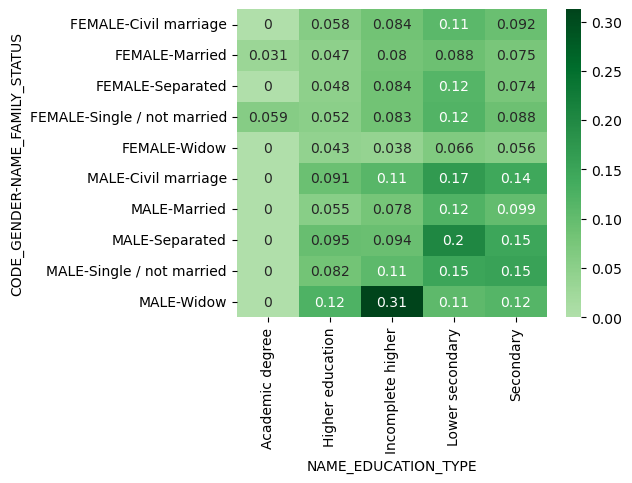

In [167]:
#Creating HEATMAP having gender,family status,education type with respect to Target.
plt.figure(figsize=(5,4))
sns.heatmap(pivot_table_1,cmap="Greens",annot=True,center=0.08072881945686496)
plt.show()

<b>INSIGHTS:<br>
 <b>* We can observe that MALE Widow having Incomplete Higher education are more prone to defaulter than others.Whereas Acadamic
   Degree holder MALE or FEMALE with any family status are very less likely to be defaulter.<br></b>

In [168]:
#Creating pivot table with gender,family contract type, occupation type with respect to Target.
pivot_table_2= pd.pivot_table(data = inp0, values='TARGET', index=['CODE_GENDER','NAME_CONTRACT_TYPE'],
                      columns=['OCCUPATION_TYPE'], aggfunc=np.mean)

pivot_table_2

OCCUPATION_TYPE                 Accountants  Cleaning staff  Cooking staff  \
CODE_GENDER NAME_CONTRACT_TYPE                                               
FEMALE      Cash loans             0.050066        0.095275       0.104154   
            Revolving loans        0.032759        0.092732       0.091111   
MALE        Cash loans             0.063025        0.112500       0.125498   
            Revolving loans        0.043478        0.052632       0.050847   

OCCUPATION_TYPE                 Core staff   Drivers  HR staff  \
CODE_GENDER NAME_CONTRACT_TYPE                                   
FEMALE      Cash loans            0.062140  0.083924  0.067720   
            Revolving loans       0.040889  0.088608  0.037037   
MALE        Cash loans            0.080610  0.117730  0.085714   
            Revolving loans       0.038405  0.076803  0.000000   

OCCUPATION_TYPE                 High skill tech staff  IT staff  Laborers  \
CODE_GENDER NAME_CONTRACT_TYPE                                              
FEMALE      Cash loans                       0.066000  0.070312  0.066292   
            Revolving loans                  0.042353  0.033333  0.051272   
MALE        Cash loans                       0.061003  0.082192  0.109834   
            Revolving loans                  0.042146  0.000000  0.062635   

OCCUPATION_TYPE                 Low-skill Laborers  Managers  Medicine staff  \
CODE_GENDER NAME_CONTRACT_TYPE                                                 
FEMALE      Cash loans                    0.147651  0.058738        0.067305   
            Revolving loans               0.217391  0.026295        0.053915   
MALE        Cash loans                    0.183824  0.075364        0.108108   
            Revolving loans               0.071429  0.039582        0.000000   

OCCUPATION_TYPE                 Private service staff  Realty agents  \
CODE_GENDER NAME_CONTRACT_TYPE                                         
FEMALE      Cash loans                       0.066903       0.071313   
            Revolving loans                  0.056940       0.055556   
MALE        Cash loans                       0.068627       0.189655   
            Revolving loans                  0.083333       0.000000   

OCCUPATION_TYPE                 Sales staff  Secretaries  Security staff  \
CODE_GENDER NAME_CONTRACT_TYPE                                             
FEMALE      Cash loans             0.099474     0.069955        0.098825   
            Revolving loans        0.073394     0.045455        0.072289   
MALE        Cash loans             0.097896     0.111111        0.115885   
            Revolving loans        0.066339     0.500000        0.068966   

OCCUPATION_TYPE                 Waiters/barmen staff  
CODE_GENDER NAME_CONTRACT_TYPE                        
FEMALE      Cash loans                      0.118511  
            Revolving loans                 0.093168  
MALE        Cash loans                      0.107383  
            Revolving loans                 0.000000

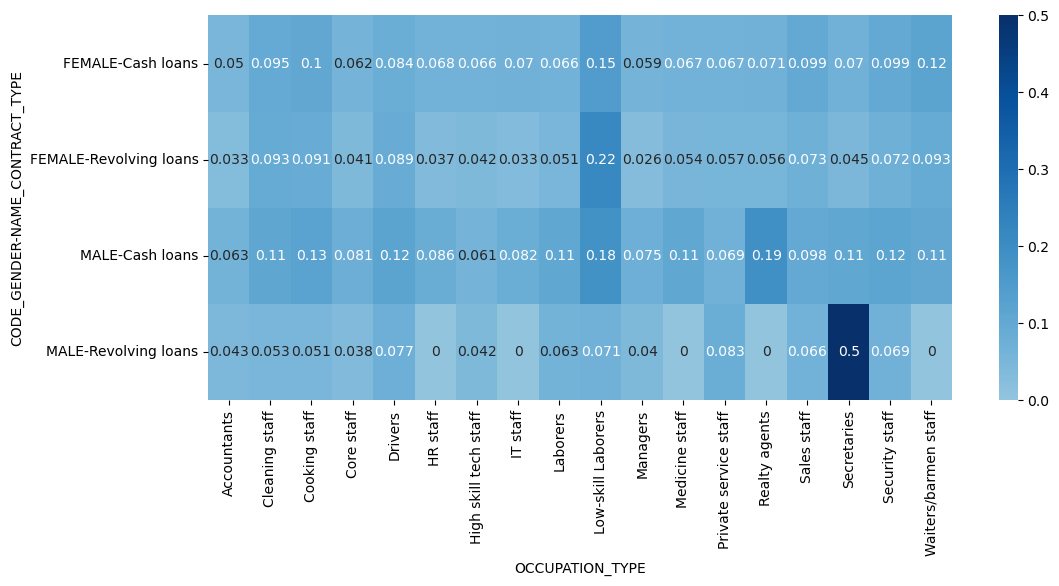

In [169]:
#Creating HEATMAP with gender,family contract type, occupation type with respect to Target.
plt.figure(figsize=(12,5))
sns.heatmap(pivot_table_2,cmap="Blues",annot=True,center=0.08072881945686496)
plt.show()

<b>MALE Secretaries having a revolving payment type loans are more likely to be defaulter.</b>

In [170]:
#Creating pivot table with gender,age,Education type with respect to Target.
pivot_table_3= pd.pivot_table(data = inp0, values='TARGET', index=['CODE_GENDER',a],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

pivot_table_3

NAME_EDUCATION_TYPE         Academic degree  Higher education  \
CODE_GENDER DAYS_BIRTH                                          
FEMALE      (19.999, 32.0]             0.00          0.061760   
            (32.0, 39.0]               0.15          0.047462   
            (39.0, 47.0]               0.00          0.045031   
            (47.0, 56.0]               0.00          0.042902   
            (56.0, 69.0]               0.00          0.034458   
MALE        (19.999, 32.0]             0.00          0.072272   
            (32.0, 39.0]               0.00          0.062039   
            (39.0, 47.0]               0.00          0.062032   
            (47.0, 56.0]               0.00          0.062247   
            (56.0, 69.0]               0.00          0.049772   

NAME_EDUCATION_TYPE         Incomplete higher  Lower secondary  Secondary  
CODE_GENDER DAYS_BIRTH                                                     
FEMALE      (19.999, 32.0]           0.095070         0.180723   0.131023  
            (32.0, 39.0]             0.076336         0.147309   0.097693  
            (39.0, 47.0]             0.065051         0.121951   0.075580  
            (47.0, 56.0]             0.046181         0.081159   0.057610  
            (56.0, 69.0]             0.037143         0.052773   0.047880  
MALE        (19.999, 32.0]           0.099390         0.138643   0.143194  
            (32.0, 39.0]             0.076305         0.165450   0.124495  
            (39.0, 47.0]             0.087591         0.151261   0.101984  
            (47.0, 56.0]             0.099237         0.094118   0.101277  
            (56.0, 69.0]             0.063380         0.103746   0.074368

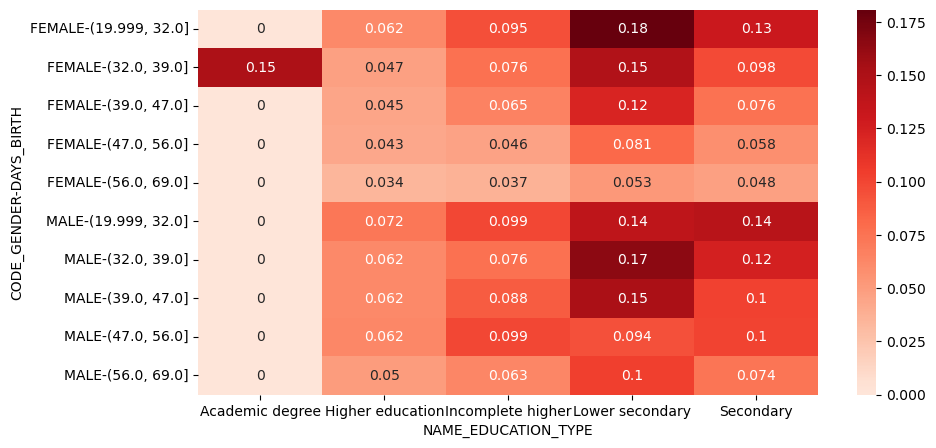

In [171]:
#Creating HEATMAP with gender,age,Education type with respect to Target.
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table_3,cmap="Reds",annot=True,center=0.08072881945686496)
plt.show()

<b>FEMALES between 19 to 39 yrs ,whose education is Lower Secondary and Academic Degree are more likely to be Defaulter.
And MALE between 32 to 39 yrs,whose education is Lower Secondary are more likely to be Defaulter.</b>

# ****** <u> PREVIOUS APPLICATION DATA ANALYSIS </u> *******

In [136]:
#Reading PREVIOUS APPLICATION DATA
inp1 = pd.read_csv('previous_application.csv')
inp1.tail(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [ ]:
#Analyzing PREVIOUS APPLICATION DATA
inp1.shape

In [ ]:
#Analyzing INFORMATION OF PREVIOUS APPLICATION DATA
inp1.info(verbose=1)

In [ ]:
#Analyzing DESCRIPTION OF PREVIOUS APPLICATION DATA
inp1.describe()

In [ ]:
#Analyzing COLUMNS OF PREVIOUS APPLICATION DATA
inp1.columns

In [ ]:
#Analyzing LENGTH OF PREVIOUS APPLICATION DATA
len(inp1)

In [ ]:
#Analyzing SIZE OF PREVIOUS APPLICATION DATA
inp1.size

# <u> Step:1 Checking For Missing Values</u>

In [137]:
q = inp1.columns[(inp1.isnull().any())].tolist()

In [138]:
# To check the percentgae of null values present in each column of our dataset
for i in q:
    print(i,"\t",inp1[i].isnull().sum()/int(inp1.shape[0]) *100.0)

AMT_ANNUITY 	 22.286665062081866
AMT_CREDIT 	 5.9872567227912114e-05
AMT_DOWN_PAYMENT 	 53.636480115721696
AMT_GOODS_PRICE 	 23.08177275486854
RATE_DOWN_PAYMENT 	 53.636480115721696
RATE_INTEREST_PRIMARY 	 99.6436983524267
RATE_INTEREST_PRIVILEGED 	 99.6436983524267
NAME_TYPE_SUITE 	 49.11975351661524
CNT_PAYMENT 	 22.286365699245724
PRODUCT_COMBINATION 	 0.02071590826085759
DAYS_FIRST_DRAWING 	 40.29812946125467
DAYS_FIRST_DUE 	 40.29812946125467
DAYS_LAST_DUE_1ST_VERSION 	 40.29812946125467
DAYS_LAST_DUE 	 40.29812946125467
DAYS_TERMINATION 	 40.29812946125467
NFLAG_INSURED_ON_APPROVAL 	 40.29812946125467


In [139]:
# creating 2 list 1 more than 40% null value and 2 less than 40%
# we will drop for more than 40%
# we will check for null value less than 40% ,using fillna method we will substitute value.
col_to_drop1=[]
col_to_fill1=[]
for i in q:  
     val = inp1[i].isnull().sum()/int(inp1.shape[0]) *100.0
     if val > 40  :
        col_to_drop1.append(i)
     elif val <= 40 :
        col_to_fill1.append(i)

In [140]:
# more than 40% null values
col_to_drop1

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [141]:
## Dropping those columns which have null values > 40%
inp1.drop(col_to_drop1,inplace=True,axis=1)

In [142]:
# between 0 to 40%
col_to_fill1

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION']

In [143]:
inp1.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [144]:
# Droping all Null using using Conditional Quantifier
inp1 = inp1[~inp1['AMT_ANNUITY'].isnull()]
inp1 = inp1[~inp1['AMT_GOODS_PRICE'].isnull()]
inp1 = inp1[~inp1['CNT_PAYMENT'].isnull()]
inp1=inp1[~inp1['PRODUCT_COMBINATION'].isnull()]

In [145]:
inp1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [146]:
inp1.shape

(1246320, 26)

# <u>Step3 : Changing for some specific values and Missing Value Substitution</u>

In [ ]:
inp1.dtypes

In [ ]:
inp1['NAME_CONTRACT_TYPE'].value_counts()

In [ ]:
inp1['WEEKDAY_APPR_PROCESS_START'].value_counts()

In [ ]:
inp1['FLAG_LAST_APPL_PER_CONTRACT']= inp1['FLAG_LAST_APPL_PER_CONTRACT'].apply(lambda x :'Yes' if x=='Y' else 'No' )

In [ ]:
inp1['FLAG_LAST_APPL_PER_CONTRACT'].value_counts()

In [ ]:
inp1['NAME_CASH_LOAN_PURPOSE'].value_counts()

In [ ]:
inp1['NAME_CASH_LOAN_PURPOSE']=inp1['NAME_CASH_LOAN_PURPOSE'].replace("XNA",np.NaN)
inp1['NAME_CASH_LOAN_PURPOSE']=inp1['NAME_CASH_LOAN_PURPOSE'].replace("XAP",np.NaN)

In [ ]:
inp1['NAME_CONTRACT_STATUS'].value_counts()

In [155]:
inp1['NAME_CONTRACT_STATUS'] = inp1['NAME_CONTRACT_STATUS'].replace('Canceled','Cancelled')

In [ ]:
inp1['NAME_PAYMENT_TYPE'].value_counts()

In [ ]:
inp1['NAME_PAYMENT_TYPE']=inp1['NAME_PAYMENT_TYPE'].replace("XNA",np.NaN)

In [ ]:
inp1['NAME_PAYMENT_TYPE'].value_counts()

In [ ]:
inp1['NAME_PAYMENT_TYPE']=inp1['NAME_PAYMENT_TYPE'].replace("XNA",np.NaN)

In [ ]:
inp1['CODE_REJECT_REASON'].value_counts()

In [ ]:
inp1['CODE_REJECT_REASON']=inp1['CODE_REJECT_REASON'].replace("XNA",np.NaN)

In [ ]:
inp1['NAME_CLIENT_TYPE'].value_counts()

In [ ]:
inp1['NAME_CLIENT_TYPE']=inp1['NAME_CLIENT_TYPE'].replace("XNA",np.NaN)

In [ ]:
inp1['NAME_GOODS_CATEGORY'].value_counts()

In [ ]:
inp1['NAME_GOODS_CATEGORY']=inp1['NAME_GOODS_CATEGORY'].replace("XNA",np.NaN)

In [ ]:
inp1['NAME_PORTFOLIO'].value_counts()

In [ ]:
inp1['NAME_PRODUCT_TYPE'].value_counts()

In [ ]:
inp1['NAME_PRODUCT_TYPE']=inp1['NAME_PRODUCT_TYPE'].replace("XNA",np.NaN)

In [ ]:
inp1['CHANNEL_TYPE'].value_counts()

In [ ]:
inp1['NAME_SELLER_INDUSTRY'].value_counts()

In [ ]:
inp1['NAME_SELLER_INDUSTRY']=inp1['NAME_SELLER_INDUSTRY'].replace("XNA",np.NaN)

In [ ]:
inp1['PRODUCT_COMBINATION'].value_counts()

In [ ]:
inp1.isnull().sum()

In [ ]:
inp1['DAYS_DECISION'].value_counts()

In [ ]:
inp1['DAYS_DECISION']=abs(inp1['DAYS_DECISION'])

In [ ]:
inp1['SELLERPLACE_AREA']=abs(inp1['SELLERPLACE_AREA'])

In [ ]:
inp1.isnull().sum()

In [ ]:
# Before that dropping some variables which are needed while doing Analysis.
inp1.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"
                ,"SELLERPLACE_AREA"],axis=1,inplace=True)

In [ ]:
inp1.shape

<b>We removed all XNA and XAP values from all categorical data as it is of no use while doing data Analysis.
For that we first replaced all XNA and XAP values to np.NaN .Then we can further handle then by using replace(),fillna(),or 
mode() accordingly.Orelse we can drop all NaN rows and do further analysis in Future.</b>

# <u> Step 4 : Data Visualization using Ploting And Finding Insight</u>

<b> 1.UNIVARIATE ANALYSIS</b>

In [ ]:
#Reset the index
inp1.reset_index(inplace=True, drop=True)
inp1.info()

In [ ]:
### Now creating list of numerical variables for outlier detection and finding insights
list_of_int_val1 =[]
for i in inp1:
    if (inp1[i].dtypes == 'int64') or (inp1[i].dtypes == 'float64'):
         list_of_int_val1.append(i)            
print(list_of_int_val1)

In [ ]:
inp1.head()

# (i)--Outlier Analysis of each Numerical Variable With Distribution Plot

In [ ]:
 inp1['AMT_ANNUITY'].describe()

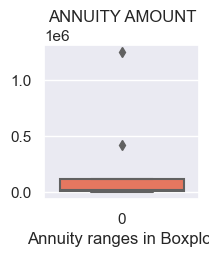

In [254]:
plt.figure(figsize = (2,2))
sns.boxplot(inp1['AMT_ANNUITY'].describe(),palette = 'Reds').set(title="ANNUITY AMOUNT", xlabel="Annuity ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion .No as such outlier present in Loan Annuity in Previous application.</b>

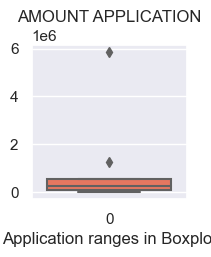

In [255]:
plt.figure(figsize = (2,2))
sns.boxplot(inp1['AMT_APPLICATION'].describe(),palette = 'Reds').set(title="AMOUNT APPLICATION", 
                                                                     xlabel="Application ranges in Boxplot")
plt.show()

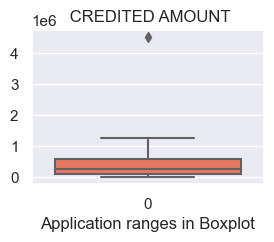

In [256]:
plt.figure(figsize = (3,2))
sns.boxplot(inp1['AMT_CREDIT'].describe(),palette = 'Reds').set(title=" CREDITED AMOUNT", 
                                                                     xlabel="Application ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion .No as such outlier present For how much credit did client ask on the previous application.</b>

# INSIGHTS ANALYSIS:[We checked all Numerical Variable one by one and found the fallowing Insights]

* AMT_ANNUITY -- Data is in Continous fashion .No as such outlier present in Loan Annuity in Previous application.

* AMT_APPLICATION--Data is in Continous fashion .No as such outlier present For how much credit did client ask on the previous                    application.

* AMT_CREDIT -- Data is in Continous fashion .No as such outlier present in Amount Credit in Previous application.

* AMT_GOODS_PRICE --Data is in Continous fashion .No as such outlier present in Goods price of good that client asked for (if applicable) on the previous application.

* DAYS_DECISION -- Data is spiky some outlier are present.

* CNT_PAYMENT -- Data is in Continous fashion .No as such outlier present.

# (ii) -- Outlier Analysis with Categorical Variables with Distribution Plot

In [257]:
# list of Categorical Variable Datatype
list_of_cat =[]
for i in inp1:
    if (inp1[i].dtypes == 'object') :
         list_of_cat.append(i)            
print(list_of_cat)

['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


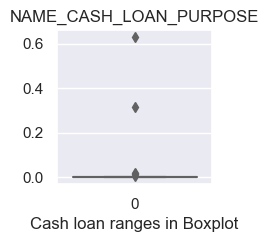

In [258]:
plt.figure(figsize = (2,2))
sns.boxplot(inp1['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True),palette = 'Reds').set(title="NAME_CASH_LOAN_PURPOSE", xlabel="Cash loan ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion .But some outlier present.</b>

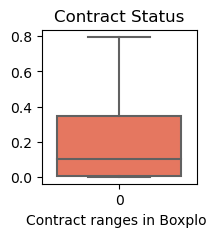

In [108]:
plt.figure(figsize = (2,2))
sns.boxplot(inp1['NAME_CONTRACT_STATUS'].value_counts(normalize=True),palette = 'Reds').set(title="Contract Status", xlabel="Contract ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion .No as such outlier present.</b>

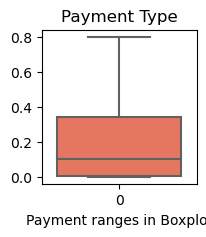

In [109]:
plt.figure(figsize = (2,2))
sns.boxplot(inp1['NAME_PAYMENT_TYPE'].value_counts(normalize=True),palette = 'Reds').set(title="Payment Type", xlabel="Payment ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion .No as such outlier present.</b>

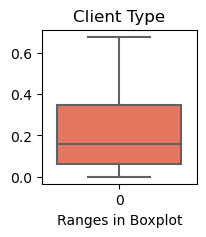

In [110]:
plt.figure(figsize = (2,2))
sns.boxplot(inp1['NAME_CLIENT_TYPE'].value_counts(normalize=True),palette = 'Reds').set(title="Client Type", xlabel="Ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion .No as such outlier present.</b>

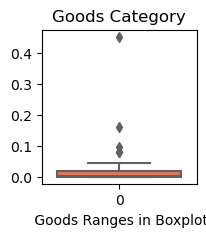

In [132]:
plt.figure(figsize = (2,2))
sns.boxplot(inp1['NAME_GOODS_CATEGORY'].value_counts(normalize=True),palette = 'Reds').set(title="Goods Category", xlabel=" Goods Ranges in Boxplot")
plt.show()

<b>Data is in Continous fashion .But some outlier present.</b>

# <u> 4.1 DISTRIBUTION PLOT WITH RESPECT TO CONTRACT STATUS </u>

In [148]:
# List of imp numeric feilds only
imp_num_list1 = ['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT'] 

 <b><u>(i)--WITH RESPECT TO APPROVED</u></b>

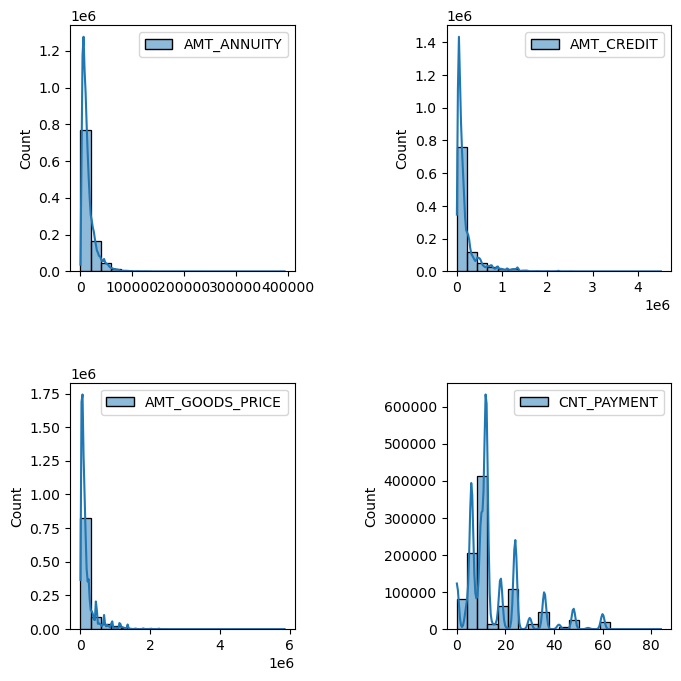

In [150]:
fig, axes = plt.subplots(2, 2,figsize=(8,8))
for item,ax in zip(imp_num_list1,axes.flatten()):
     sns.histplot(data=inp1[(inp1.NAME_CONTRACT_STATUS=='Approved')][[item]],kde=True,bins=20,ax=ax)
fig.tight_layout(pad=5.0)
plt.show()  

<b>(ii)--WITH RESPECT TO REFUSED</b>

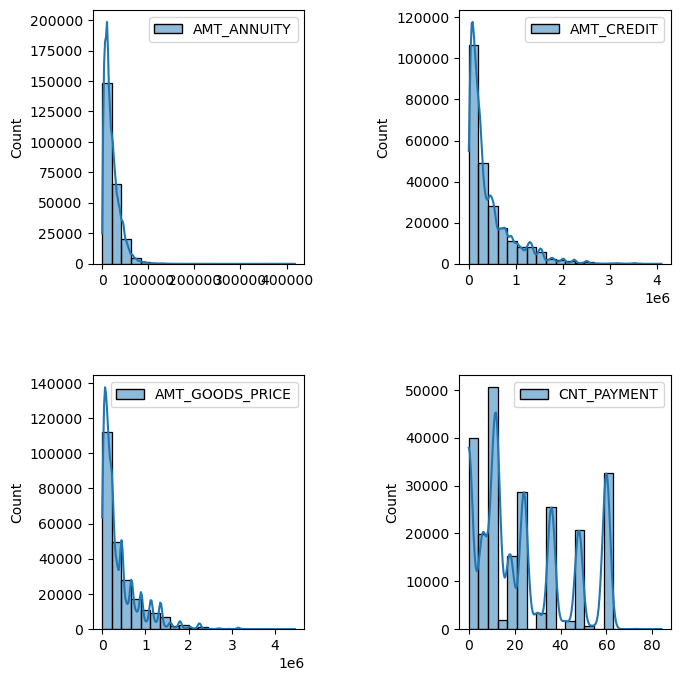

In [151]:
fig, axes = plt.subplots(2, 2,figsize=(8,8))
for item,ax in zip(imp_num_list1,axes.flatten()):  
    sns.histplot(data=inp1[(inp1.NAME_CONTRACT_STATUS=='Refused')][[item]],kde=True,bins=20,ax=ax)
fig.tight_layout(pad=5.0)
plt.show() 

<b>(iii)--WITH RESPECT TO CANCELLED</b>

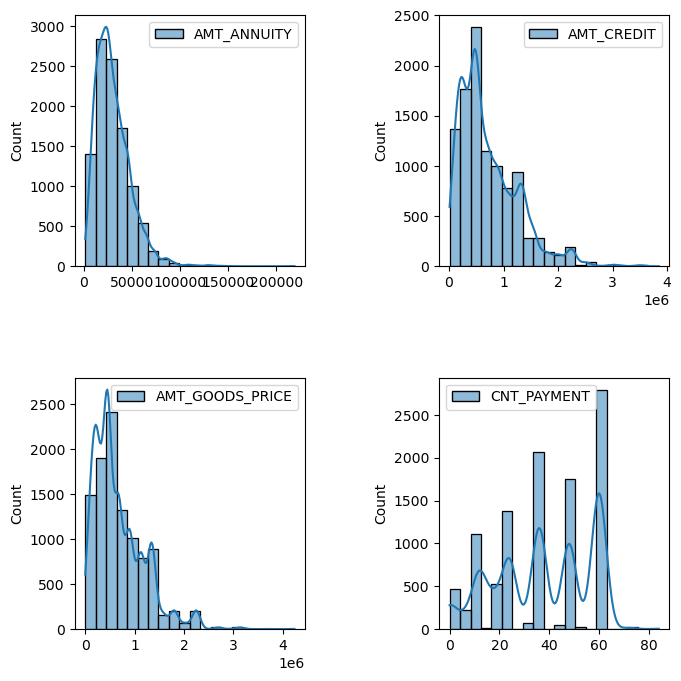

In [156]:
fig, axes = plt.subplots(2, 2,figsize=(8,8))
for item,ax in zip(imp_num_list1,axes.flatten()):
     sns.histplot(data=inp1[(inp1.NAME_CONTRACT_STATUS=='Cancelled')][[item]],kde=True,bins=20,ax=ax)
fig.tight_layout(pad=5.0)
plt.show()  

<b>(iv)--WITH RESPECT TO UNUSED OFFER</b>

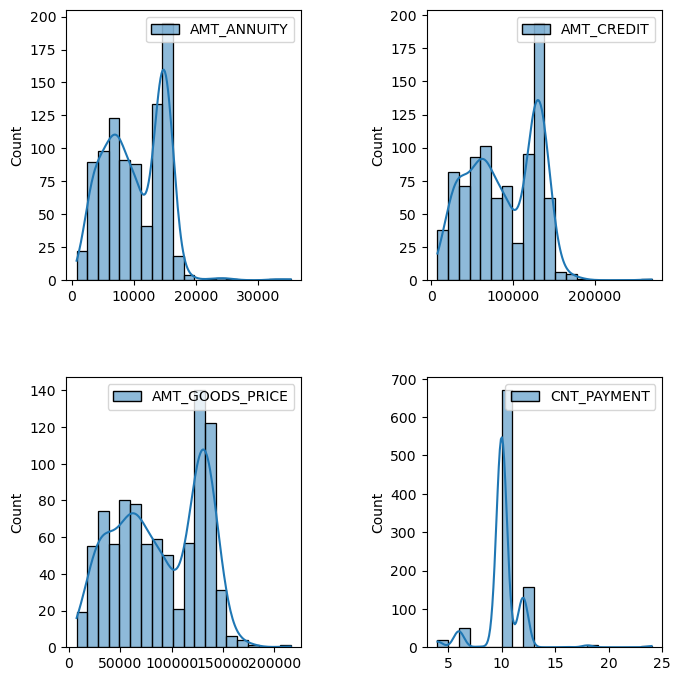

In [153]:
fig, axes = plt.subplots(2, 2,figsize=(8,8))
for item,ax in zip(imp_num_list1,axes.flatten()):
    sns.histplot(data=inp1[(inp1.NAME_CONTRACT_STATUS=='Unused offer')][[item]],kde=True,bins=20,ax=ax)
fig.tight_layout(pad=5.0)
plt.show() 

Hist Plot Shows the shape of data of the client with respect to Client's<b> Amount Annuity, Credit, Goods Price, Type of Payment
mode</b> applied for loan with respect to <b>NAME_CONTRACT_STATUS VARIABLE</b>

# <u>Joining Both DataSet</u>

<b>Before joining we can see that some feilds have same name in both data model ,hence we have to rename it in any one data model.</b>

In [259]:
inp1.rename(columns = {'NAME_CONTRACT_TYPE':'NAME_CONTRACT_TYPE_PREV'}, inplace = True)
inp1.rename(columns = {'AMT_ANNUITY':'AMT_ANNUITY_PREV'}, inplace = True)
inp1.rename(columns = {'AMT_CREDIT':'AMT_CREDIT_PREV'}, inplace = True)
inp1.rename(columns = {'AMT_GOODS_PRICE':'AMT_GOODS_PRICE_PREV'}, inplace = True)

In [260]:
inp_total = pd.merge(left=inp0 , right=inp1, how='inner', on='SK_ID_CURR')

In [261]:
inp_total.shape

(1061189, 51)

In [262]:
inp_total.tail(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1061184,456255,0,Cash loans,FEMALE,No,No,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle
1061185,456255,0,Cash loans,FEMALE,No,No,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street
1061186,456255,0,Cash loans,FEMALE,No,No,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_normal,Cash Street: low
1061187,456255,0,Cash loans,FEMALE,No,No,0,157500.0,675000.0,49117.5,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low
1061188,456255,0,Cash loans,FEMALE,No,No,0,157500.0,675000.0,49117.5,...,Repeater,Computers,POS,XNA,Country-wide,20,Connectivity,6.0,high,POS mobile with interest


In [117]:
inp_total.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061189 entries, 0 to 1061188
Data columns (total 51 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1061189 non-null  int64  
 1   TARGET                        1061189 non-null  int64  
 2   NAME_CONTRACT_TYPE            1061189 non-null  object 
 3   CODE_GENDER                   1061189 non-null  object 
 4   FLAG_OWN_CAR                  1061189 non-null  object 
 5   FLAG_OWN_REALTY               1061189 non-null  object 
 6   CNT_CHILDREN                  1061189 non-null  int64  
 7   AMT_INCOME_TOTAL              1061189 non-null  float64
 8   AMT_CREDIT                    1061189 non-null  float64
 9   AMT_ANNUITY                   1061189 non-null  object 
 10  AMT_GOODS_PRICE               1061189 non-null  object 
 11  NAME_TYPE_SUITE               1061189 non-null  object 
 12  NAME_INCOME_TYPE            

# <u> Univariate Analysis </u>

<b> (i)Distribution Plot for Numerical Variables</b>

In [263]:
list_to_study1 = ["AMT_ANNUITY_PREV","AMT_APPLICATION","AMT_CREDIT_PREV","AMT_GOODS_PRICE_PREV","AMT_INCOME_TOTAL","AMT_CREDIT",
                "CNT_PAYMENT","DAYS_REGISTRATION"]

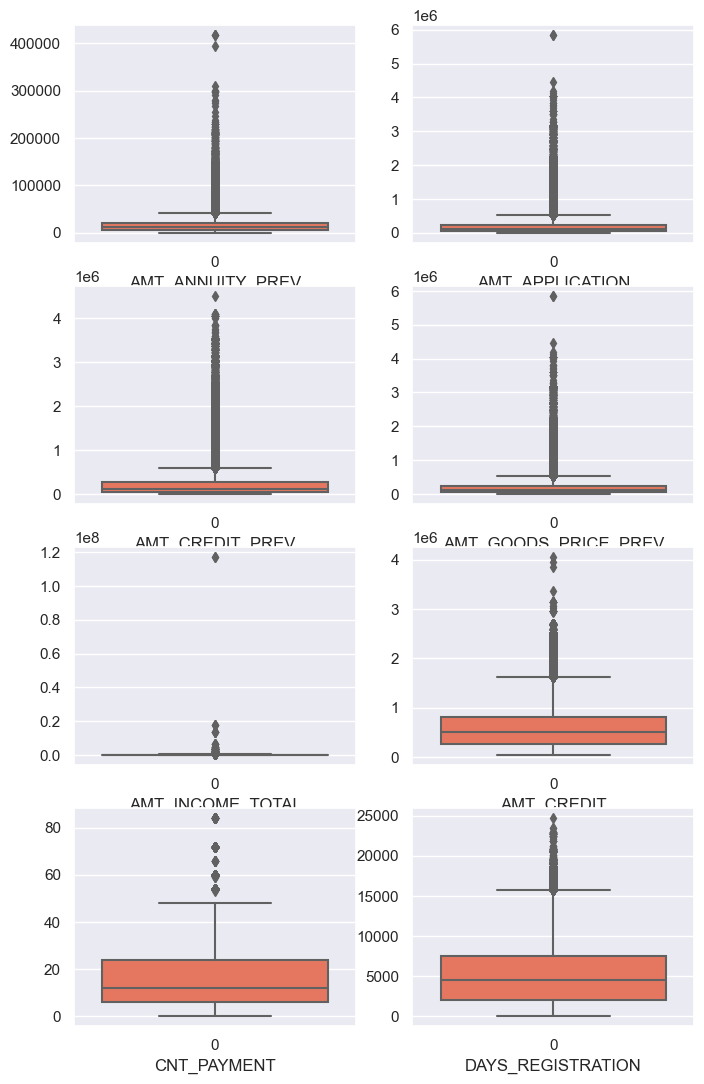

In [264]:
fig, axes = plt.subplots(4, 2,figsize=(8,13))
for item,ax in zip(list_to_study1, axes.flatten()):    
    sns.boxplot(data=inp_total[item],ax=ax,palette = "Reds")
    ax.set_xlabel(item)    
plt.show()

Here We can analyse the <b> AMT_CREDIT ,AMT_CREDIT_PREV, AMT_GOODS_PRICE_PREV, CNT_PAYMENT, DAYS_REGISTRATION, AMT_INCOME_TOTAL,
AMT_APPLICATION </b> by joining both the dataset together.As such no outlier is present.Data is in continous fashion as we already 
checked both dataset individually.

<b> (ii) Distribution Plot for Categorical Variables</b>

In [118]:
list_to_study2 = ["CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","OCCUPATION_TYPE","NAME_CASH_LOAN_PURPOSE","NAME_GOODS_CATEGORY",
                "PRODUCT_COMBINATION","NAME_PRODUCT_TYPE"]

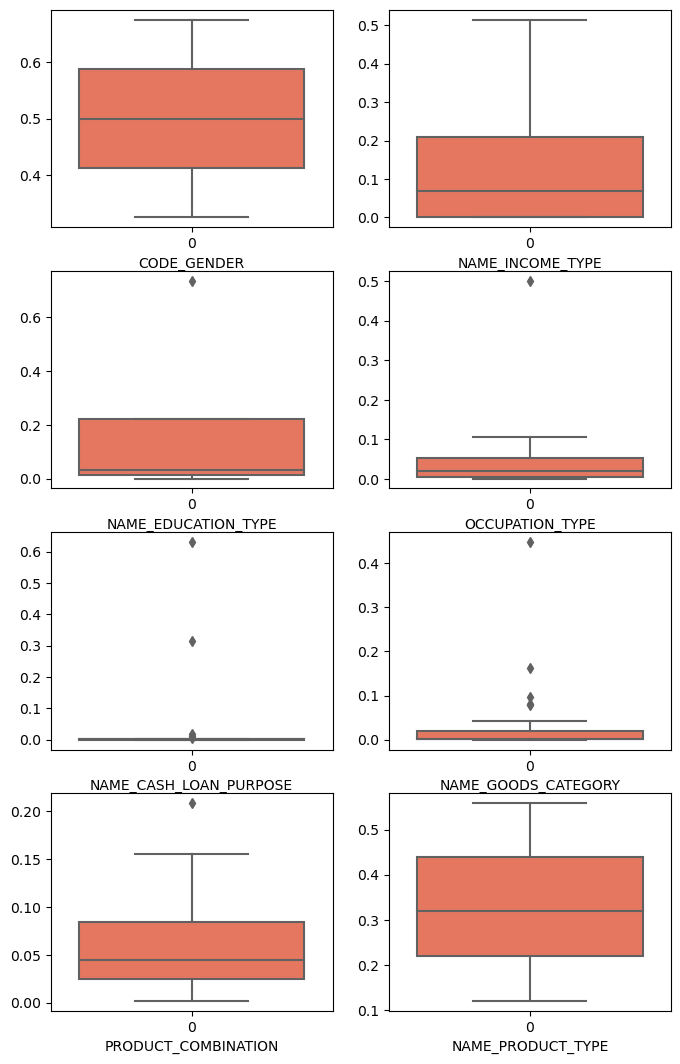

In [120]:
fig, axes = plt.subplots(4, 2,figsize=(8,13))
for item,ax in zip(list_to_study2, axes.flatten()):    
    sns.boxplot(data=inp_total[item].value_counts(normalize=True),ax=ax,palette = "Reds")
    ax.set_xlabel(item)    
plt.show()

Here We can analyse the <b> CODE_GENDER ,NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, OCCUPATION_TYPE, NAME_CASH_LOAN_PURPOSE, NAME_GOODS_CATEGORY,
PRODUCT_COMBINATION,NAME_PRODUCT_TYPE </b> by joining both the dataset together.As such no outlier is present.Data is in continous fashion as we already 
checked both dataset individually

# <u>CHECKING DATA IMBALANCE </u>

<b>1. We are checking data imbalance with respect to TARGET Variable.</b>

In [177]:
inp_total['TARGET']=inp_total['TARGET'].replace(0,"Non Defaulters")
inp_total['TARGET']=inp_total['TARGET'].replace(1,"Defaulters")

In [178]:
inp_total['TARGET'].value_counts()

Non Defaulters    972465
Defaulters         88724
Name: TARGET, dtype: int64

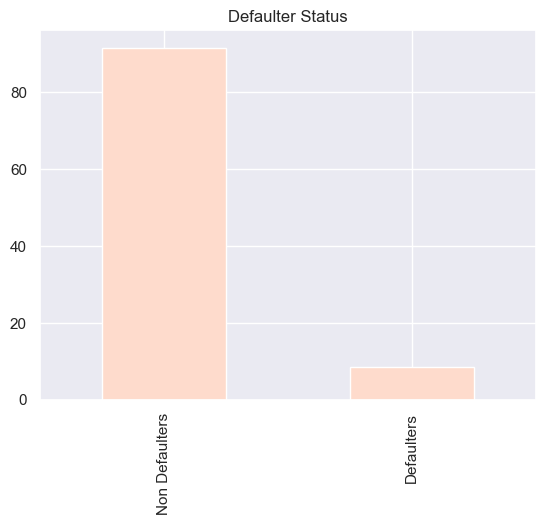

In [179]:
sns.set_theme(style="darkgrid", palette="Reds")
(inp_total['TARGET'].value_counts(normalize = True) * 100.0).plot.bar()
plt.title("Defaulter Status")
plt.show()

<b>INSIGHTS: <br>

We can see the data imbalance in TARGET Coloumn as 90% domain specific who are not defaulters.<br>

1. About <b>90% </b>clients belongs to Others are not Defaulters <br>
2. About <b>10% </b> Clients are Defaulters.<br>
    

<b> 2. We are checking data imbalance with respect to NAME_CONTRACT_STATUS Variable.</b>

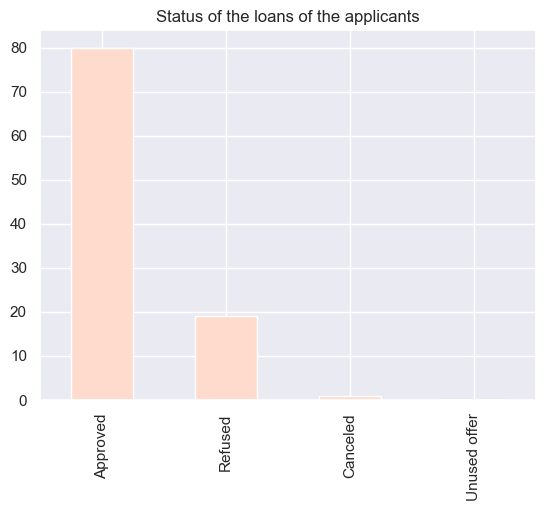

In [180]:
sns.set_theme(style="darkgrid", palette="Reds")
(inp_total['NAME_CONTRACT_STATUS'].value_counts(normalize = True) * 100.0).plot.bar()
plt.title("Status of the loans of the applicants")
plt.show()

<b> INSIGHTS: <br>
We can see the data imbalance here is with Approved as majority of cases are APPROVED.So it is also dominent. <br>

1. About<b> 80% </b>loans were approved <br>
2. About<b> 19% </b>loans were refused <br>
3. About<b> 2% </b>loans were cancelled <br>
4. About<b> 1% </b>loans were unused offer <br>


# <u> BIVARIATE ANALYSIS</u>

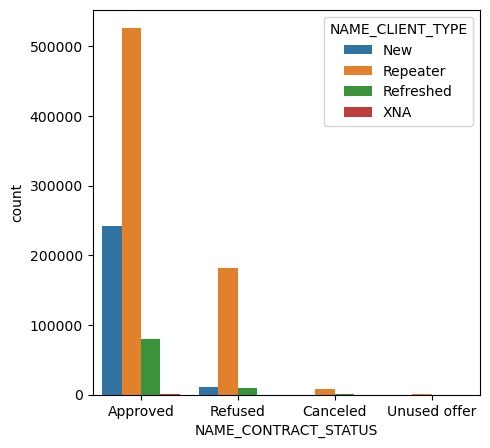

In [176]:
# client type with respect to Contract Status
plt.figure(figsize=(5,5))
sns.countplot(data=inp_total,x="NAME_CONTRACT_STATUS",hue="NAME_CLIENT_TYPE")
plt.show()

<b>INSIGHT: <br>
We can observe that people who are Repeater are more likely to get Approved for loan than others,They are also get refused many times.<br>

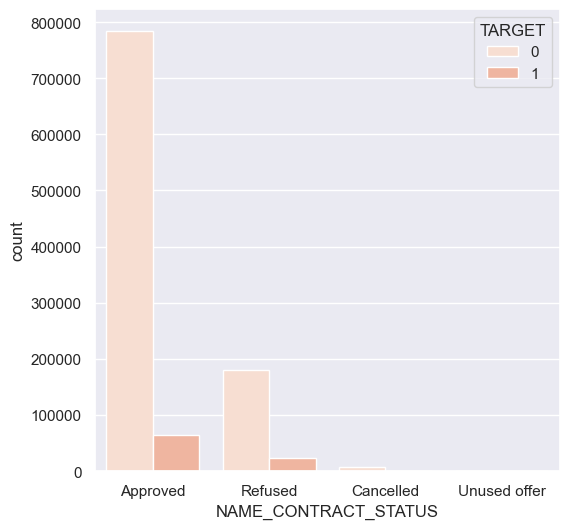

In [265]:
#Very important analysis between Target and Contract Status
plt.figure(figsize=(6,6))
sns.countplot(data=inp_total,x="NAME_CONTRACT_STATUS",hue="TARGET")
plt.show()

<b>INSIGHT:<br>
We can observe that people who are Not Defaulters are more likely to get Approved for loan than others,They are also get refused many times.<br>

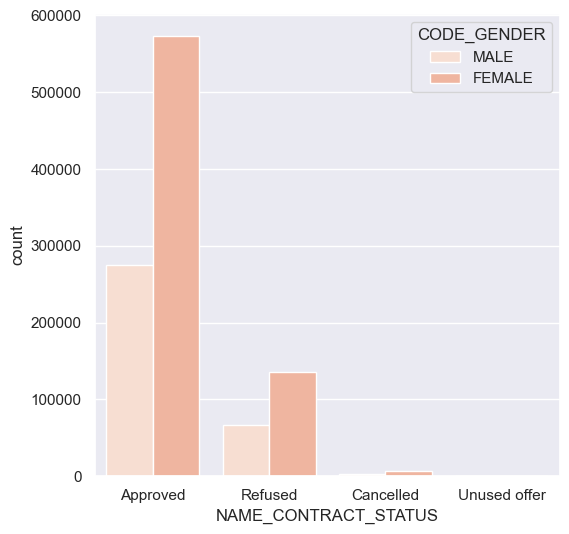

In [266]:
#Gender with respect to Contract Status
plt.figure(figsize=(6,6))
sns.countplot(data=inp_total,x="NAME_CONTRACT_STATUS",hue="CODE_GENDER")
plt.show()

<b>INSIGHT:<br>
We can observe that FEMALES are more likely to get Approved for loan than MALES,They are also get refused many times.<br>

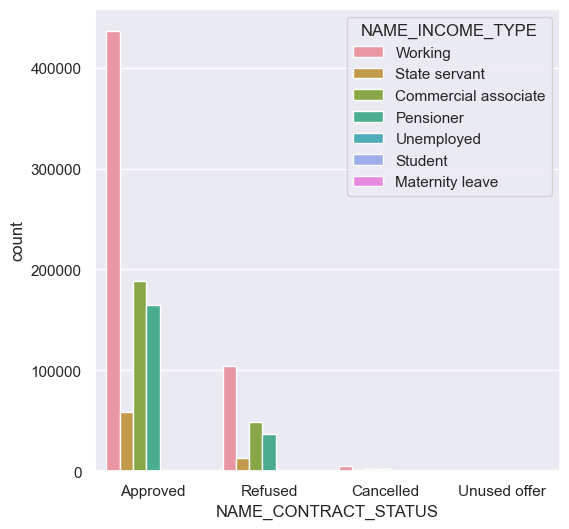

In [267]:
#Income type with respect to Contract Status
plt.figure(figsize=(6,6))
sns.countplot(data=inp_total,x="NAME_CONTRACT_STATUS",hue="NAME_INCOME_TYPE")
plt.show()

<b>INSIGHT:<br>
We can observe that Working people, State Servant , Commercial Associate , Pensioners are more likely to get Approved for loan than others.<br>

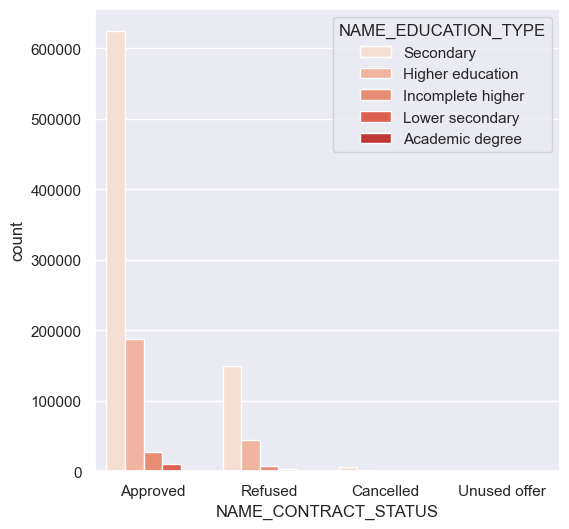

In [268]:
#Education Type with respect to Contract Status
plt.figure(figsize=(6,6))
sns.countplot(data=inp_total,x="NAME_CONTRACT_STATUS",hue="NAME_EDUCATION_TYPE")
plt.show()

<b>INSIGHT:<br>
We can observe that Secondary ,Higher Education are more likely to get Approved for loan than others.<br>

# <u> HEATMAPS OF TOTAL RECORDS (MULTIVARIATE ANALYSIS)</u>

In [172]:
result1 = inp_total[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT']]
result1.head()

,AMT_CREDIT,AMT_APPLICATION,AMT_ANNUITY,CNT_PAYMENT
0,406597.5,179055.0,24700.5,24.0
1,1293502.5,900000.0,35698.5,12.0
2,1293502.5,337500.0,35698.5,6.0
3,1293502.5,68809.5,35698.5,12.0
4,135000.0,24282.0,6750.0,4.0


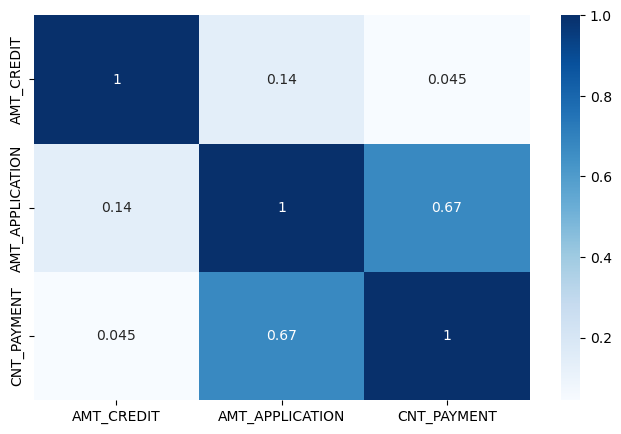

In [173]:
#Heatmap with respect to Amt_credit,amt_application,amt_annuity,cnt_payment 
plt.figure(figsize=(8,5))
sns.heatmap(result1.corr(),cmap="Blues",annot=True)
plt.show()

<b>INSIGHTS:</b><br>
    
1. AMT_CREDIT & AMT_APPLICATION : Highly correlated, nearly <b> 99%.</b><br>
2. AMT_CREDIT & AMT_ANNUITY : Highly Correlated, nearly <b>75%.</b><br>
3. AMT_ANNUITY & AMT_APPLICATION : Highly correlated, nearly <b>13%.</b><br>

In [174]:
result2 = inp_total[['AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV',"NAME_CONTRACT_STATUS"]]
result2.head()

,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,NAME_CONTRACT_STATUS
0,9251.775,179055.0,179055.0,179055.0,Approved
1,98356.995,900000.0,1035882.0,900000.0,Approved
2,64567.665,337500.0,348637.5,337500.0,Approved
3,6737.310,68809.5,68053.5,68809.5,Approved
4,5357.250,24282.0,20106.0,24282.0,Approved


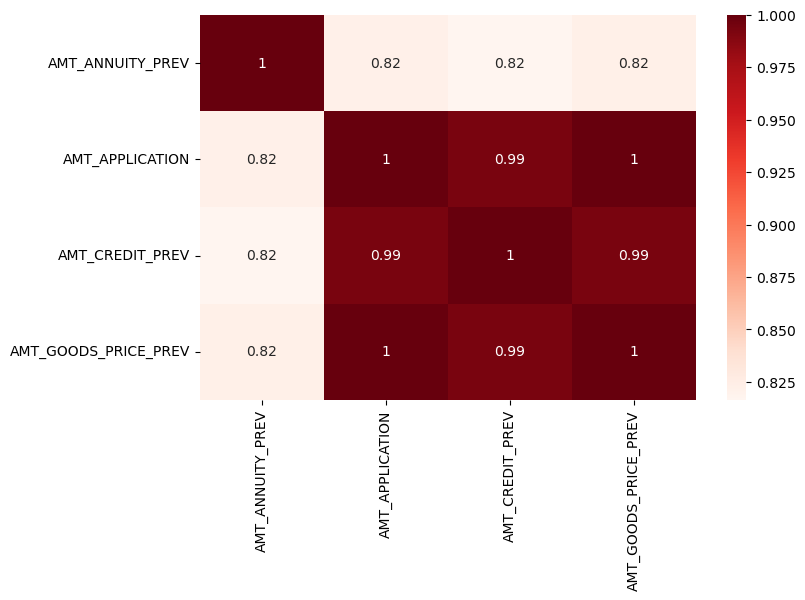

In [175]:
plt.figure(figsize=(8,5))
sns.heatmap(result2.corr(),cmap="Reds",annot=True)
plt.show()

<b>INSIGHTS:</b><br>
    
1. AMT_CREDIT_PREV & AMT_APPLICATION : Highly correlated, nearly <b>99%.</b><br>
2. AMT_CREDIT_PREV & AMT_ANNUITY_PREV : Highly Correlated, nearly <b>82%.</b><br>
3. AMT_ANNUITY_PREV & AMT_APPLICATION : Highly correlated, nearly <b>82%.</b><br>
4. AMT_GOODS_PRICE_PREV & AMT_APPLICATION : Highly correlated, nearly <b>99%.</b><br>

# <u>CONCLUSION:</u>


<b><u> I. After Analyzing the 'application_data.csv' we got fallowing INSIGHTS:</u></b><br>

    1. Number of Defaulter is more in CASH Payment whereas bit less in Revolving Payment Strategy. 
    
    2. Percentage of FEMALES are more for applying loan than MALES.

    3. People who owns a car or House are more likely to apply for loan as compared to those who don't own a car. 

    4. People who are Unaccompanied are more likely to apply for loan as compared to others. And Defaulter cases are 
       also same

    5. Working people are more likely to apply for loan whereas Commerical Associate and Pensioners also apply for loan.
       But defaulters are more in WORKING type people than others.

    6. Secondary Education People are more likely to apply for loan and defaulter cases are also more as compared to others

    7. Married people are more likely to apply for loan than others and defaulter rate is also more than other categories.

    8. People who lives in Houses/Apartments are more likely to apply for loans and become defaulter too as compared to 
       others.

    9. People who work as Labores, Core Staff,Managers,Drivers,Sales Staff are more likely to apply for loan. 

    10. Here we observe that Business Entity Type-3 and Self Employed Organization Working people are more likely to apply 
        for loan than other categories and there Defaulter rate is also high.

<br>
      <u><b>2. BIVARIATE ANALYSIS OF CATEGORICAL VARIABLES</b></u>

        1. MALE is earning more income than FEMALE.

        2. Busineessman is having High Income than others.

        3. Acadamic Holder is earning More income than others.

        4. Managers and Accounts have a maximum income.Remaining all are having a average amount of income.

        5. Legal Services,Retailer,Military,Security Ministers,Advertising organization's income is more as compared 
           to other organization category.But on an average remaining all have a average amount of income.

<u><b> 3. MULTIVARIATE ANALYSIS </b></u><br>

        1. MALE Widow having Incomplete Higher education are more prone to defaulter than others.Whereas Acadamic Degree
           holder MALE or FEMALE with any family status are very less likely to be defaulter.

        2. MALE Secretaries having a revolving payment type loans are more likely to be defaulter.

        3. FEMALES between 19 to 39 yrs ,whose education is Lower Secondary or Academic Degree are more likely to be 
           Defaulter.And MALE between 32 to 39 yrs,whose education is Lower Secondary are more likely to be Defaulter.

<br>

<b><u> II. After Analyzing the 'previous_application_data.csv' we got fallowing INSIGHTS:</u></b><br>

    1. People who opt for CASH contract type are more likely to be Approved not having chances of Cancellations. 
       Revolving having 70% chances getting approved and 30% of refused and 5% chances of getting cancelled. 
       Consumer have 50-50% of chances of getting Approved or Cancelled.

    2. Loan regarding Urgent needs,Repairs,Other are more likely to be approved and Refused than other type of loans.

    3. CASH through Bank Payment type are more likely to be approved and very less refused for loan than others.

    4. Majorly reasons were not provided for rejection as we can see XAP.But HC ,LIMIT,SCO resons are likely to be refused.

    5. The clients who are Repeater for applying loan are more likely to get approved for loan than NEW Client.

    6. Loans for Goods like Mobile,Electronics,Computers,Audio/Video,Furniture are more likely to be approved.

    7. Loans for X-sell are more likely to be approved than walk-in and Refused is also work in same fashion.

    8. Country-wide ,contact center,Credit and cash offices Stores like channel are more likey to be approved for loan

    9. Seller belongs to Consumer Electronics industry are more likely to be approved for loan than others. 
       Whereas Seller from Connectivity industry also get approved for loan.Refuses for loan also there in both 
       the industries.

    10. POS Household with interest,POS mobile with interest,POS industry with interest are more likely to be approved 
        for loan than others.

<br>

<b><u>III. CHECKING DATA IMBALANCE</u></b>
<br>

    1. We can see the data imbalance in TARGET Coloumn as 90% dominent to class of not defaulters.Rather than 10% Defaulter.
    2. We can see the data imbalance here is with Approved as majority of cases are APPROVED.So it is also dominent class
       than Refused,Cancelled,Unused Offers.
<br>

<u><b>On the basis of above done EDA ,Bank can check and give loan.</b></u>